<img src="ALminer_logo_header.jpg" align="center"/>

# ALminer Tutorial Notebook$^*$ <a href="https://mybinder.org/v2/gh/emerge-erc/ALminer/main?filepath=notebooks/tutorial/ALminer_tutorial.ipynb"><img style="float: right" src="https://img.shields.io/badge/launch-Jupyter%20Notebook-579ACA.svg?logo=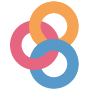"></a>

* This tutorial notebook showcases [`alminer`](https://github.com/emerge-erc/ALminer)'s various functions with examples. 
* The documentation for all functions is compiled as a [glossary](#glossary) at the end of the tutorial and can be found on the [documentation page](https://alminer.readthedocs.io/en/latest/?badge=latest). 
* To work with the tutorial notebook interactively, click on _launch Jupyter Notebook_ badge in the top right.
* In interactive mode, each cell can be executed by pressing <kbd>Shift</kbd>+<kbd>Enter</kbd>.
* All fields in this tutorial are write-protected. To work on your own examples, go to the [workstation](#workstation) below, or click on _File > New Notebook > Python 3_ to create a new empty notebook.<br>

$^*$ This Jupyter notebook may be outdated. The most up-to-date information can be found on [ALminer's documentation page](https://alminer.readthedocs.io/en/latest/?badge=latest).

## Table of contents:
0. [Load libraries](#libraries)<br>
1. [Query tools](#query)<br>
 1.1 [Query by target name](#target)<br>
 1.2 [Query by position](#position)<br>
 1.3 [Query by ALMA keywords](#keysearch)<br>
2. [Filter & explore results](#analysis)<br>
 2.1 [Explore results](#explore) <br>
 2.2 [Summarize results](#summary) <br>
 2.3 [Filter results](#filter) <br>
 2.4 [Line coverage](#line_coverage) <br>
 2.5 [Coverage of CO, 13CO, and C18O lines](#CO_lines) <br>
3. [Plot results](#results)<br>
 3.1 [Plot an overview of the observations](#plot_overview)<br>
 3.2 [Plot an overview of a given line in the observations](#plot_line_overview)<br>
 3.3 [Plot observed frequencies in each band](#plot_bands)<br>
 3.4 [Plot observations in each band](#plot_observations)<br>
 3.5 [Plot sky distribution](#plot_sky)<br>
4. [Create reports](#reports)<br>
 4.1 [Export results as a table](#save_table)<br>
 4.2 [Save overview plots](#save_source_reports)<br>
5. [Download data](#download)<br>
6. [Advanced query features](#advanced)<br>
 6.1 [Create and run your own TAP query](#create_query)<br>
 6.2 [Convert results to ALminer format](#filter_results)<br>
7. [Glossary of all functions](#glossery)<br>
8. [Workstation](#workstation)

# 0. Load libraries <a name="libraries"></a>

In [1]:
import alminer
import pandas
from astropy.io import ascii

***

# 1. Query tools <a name="query"></a>

This Section introduces three methods to query the ALMA archive:<br>
* [1.1 - Query by target name (*alminer.target*)](#target)<br>
* [1.2 - Query a catalog (*alminer.catalog*)](#catalog)<br>
* [1.3 - Query by ALMA keywords (*alminer.keysearch*)](#keysearch)<br>

#### General notes about the querying functions:
* All querying functions search the ALMA archive for public data by default. To include both public and proprietary data in the search, set *public=None*. Similarly, to search for only propietary data, set *public=False*. 
* All querying functions search the ALMA archive for both published and unpublished data. To include only unpublished data, set *published=False*.
* The querying functions will by default print a summary of the observations, including a list of target names. For large queries, it is useful to turn this feature off in order to not have a long list of targets printed to screen. To turn off this feature, simply set *print_targets=False*.
* The queries return all possible observations in [PANDAS DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) format that can be used to further narrow down your search as demonstrated in [Section 2](#explore).


## 1.1 Query by target name <a name="target"></a>

The `alminer.target` function allows one to query objects by name. This function uses the Astropy [SESAME resolver](http://cds.u-strasbg.fr/cgi-bin/Sesame) which searches multiple databases (Simbad, NED, VizieR) to obtain the coordinates of the object of interest, and then queries the ALMA archive for those coordinates and a search radius around them. The search radius is by default 1.0 arcminute, but can be modified using the *search_radius* keyword (in arcmin units). 

<br>

<details>
<summary style="display:list-item">Details of <code>target</code> function</summary>

* <u>Description</u>: Query targets by name. <br>
 * This is done by using the astropy SESAME resolver to get the target's coordinates and then the ALMA archive is queried for those coordinates and a search_radius around them. The SESAME resolver searches multiple databases (Simbad, NED, VizieR) to parse names commonly found throughout literature and returns their coordinates. If the target is not resolved in any of these databases, consider using the `keysearch` function and query the archive using the 'target_name' keyword (e.g. `keysearch({'target_name': sources})`).<br>
<br>
* <u>Command</u>:<br>
 * alminer.**target**(_sources, search_radius=1., point=False, public=True, published=None, print_query=False, print_targets=True_)<br>
<br>
* <u>Parameters</u>:<br>
 * **sources (list of str)** : list of sources by name. (IMPORTANT: sources names must be identified by at least one of Simbad, NED, or Vizier) <br> 
 * **search_radius (float, optional, default: 1 arcmin)** : Search radius (in arcmin) around the source coordinates. <br>
 * **point (bool, optional, default: False)** : Search whether the specified position (ra, dec) is contained within any ALMA observations (*point=True*) or query all ALMA observations that overlap with a cone centred at the specified position (ra, dec) and extending the search_radius (*point=False*). In the case of *point=True*, the search_radius parameter is ignored. Note that *point=True* is much faster than *point=False* but the latter should be used if one is interested in searching for mosaics. <br>
 * **public (bool, optional, default: True)** : Search for public data (*public=True*), proprietary data (*public=False*), or both public and proprietary data (*public=None*). <br>
 * **published (bool, optional, default: None)** : Search for published data only (*published=True*), unpublished data only (*published=False*), or both published and unpublished data (*published=None*). <br>
 * **print_query (bool, optional, default: False)** : Print the ADQL TAP query to the terminal. <br>
 * **print_targets (bool, optional, default: True)** : Print a list of targets with ALMA data (ALMA source names) to the terminal. <br>
 <br>
* <u>Returns</u>:<br>
 *  **pandas.DataFrame** containing the query results.
***

</details>

### Example 1.1.1: query two sources by name

In [2]:
myquery = alminer.target(['Orion KL', "AB Aur"])

alminer.target results 
Target = Orion KL
--------------------------------
Number of projects = 32
Number of observations = 89
Number of unique subbands = 269
Total number of subbands = 394
36 target(s) with ALMA data = ['OrionKL', 'OMC1_SE', 'Orion H2O maser outburst', 'f3', 'f1', 'orion_kl', 'BN-KL', 'Orion_Source_I', 'BN', 'OMC1_NW', 'f11', 'f10', 'f13', 'f15', 'f14', 'f12', 'orion-IRc2', 'Orion_KL', 'OrionKL-SV', 'f23', 'Orion_BNKL_source_I', 'ONC', 'Orion_KL_Field_1_Orion_Hot_Core', 'Orion_KL_Field_2_SMA1', 'Orion_KL_Field_3_North-west_Clump', 'OMC-1_Region5', 'Orion', 'OMC-1_Region2', 'HC602_HC606_HC608', 'f16', 'ONC_Mosaic', 'OMC-1_Region4', '104', 'Orion KL', 'Orion-KL', 'ORS-8']
--------------------------------
Target = AB Aur
--------------------------------
Number of projects = 4
Number of observations = 7
Number of unique subbands = 44
Total number of subbands = 44
3 target(s) with ALMA data = ['ab_aurigae', 'AB_Aur', 'AB_Auriga']
--------------------------------


Now let's increase the search radius:

In [3]:
myquery = alminer.target(['Orion KL', "AB Aur"], search_radius=2.0)

alminer.target results 
Target = Orion KL
--------------------------------
Number of projects = 39
Number of observations = 130
Number of unique subbands = 323
Total number of subbands = 600
59 target(s) with ALMA data = ['OrionKL', 'OMC1_SE', 'Orion H2O maser outburst', 'OrionField2', 'OrionField1-1', 'OrionField1-2', 'f5', 'f8', 'f3', 'f1', 'f7', 'f4', 'orion_kl', 'BN-KL', 'Orion_Source_I', 'BN', 'OMC1_NW', 'OrionBullets', 'f11', 'f10', 'f13', 'f15', 'f14', 'f9', 'f12', 'orion-IRc2', 'Orion_KL', 'OMC-1S', 'OrionKL-SV', 'f23', 'f16', 'OMC-1', 'Orion_BNKL_source_I', 'ONC', 'Orion_KL_Field_1_Orion_Hot_Core', 'Orion_KL_Field_2_SMA1', 'Orion_KL_Field_3_North-west_Clump', 'OMC-1_Region1', 'OMC-1_Region5', 'Orion', 'OMC-1_Region3', 'OMC-1_Region2', 'HC602_HC606_HC608', 'HC672', 'GEMS28', 'ONC_Mosaic', 'OMC-1_Region4', '104', '107', '101', '32', '71', 'Orion KL', 'Orion-KL', 'OMC1N-8-N', 'OMC1N-6-7', 'ORS-4', 'ORS-8', 'Orion1']
--------------------------------
Target = AB Aur
---------------

### Example 1.1.2: query a list of objects by name

First create a catalog or a list of object names. In this example, the catalog `Sample_cat.dat` has the following content:
```
 Name     RA      DEC   
------ -------- --------
AB_Aur  73.9412  30.5511
AK_Sco 253.6867 -36.8886
AS_310 278.3383  -4.9683
AS_470 324.0592  57.3586
AS_477 328.1421  47.2289
```

Note that the column that is used is the *Name* column and the coordinates are ignored in this example.

In [4]:
mylist = ascii.read("Sample_cat.dat", header_start=0, data_start=1)
myquery = alminer.target(mylist['Name'])

alminer.target results 
Target = AB_Aur
--------------------------------
Number of projects = 4
Number of observations = 7
Number of unique subbands = 44
Total number of subbands = 44
3 target(s) with ALMA data = ['ab_aurigae', 'AB_Aur', 'AB_Auriga']
--------------------------------
Target = AK_Sco
--------------------------------
Number of projects = 5
Number of observations = 5
Number of unique subbands = 17
Total number of subbands = 20
2 target(s) with ALMA data = ['AK_Sco', 'HIP_82747']
--------------------------------
Target = AS_310
--------------------------------
No observations found.
--------------------------------
Target = AS_470
--------------------------------
No observations found.
--------------------------------
Target = AS_477
--------------------------------
No observations found.
--------------------------------


### Example 1.1.3: include proprietary data

In [5]:
myquery = alminer.target(mylist['Name'], public=None)

alminer.target results 
Target = AB_Aur
--------------------------------
Number of projects = 5
Number of observations = 12
Number of unique subbands = 55
Total number of subbands = 82
3 target(s) with ALMA data = ['ab_aurigae', 'AB_Aur', 'AB_Auriga']
--------------------------------
Target = AK_Sco
--------------------------------
Number of projects = 5
Number of observations = 5
Number of unique subbands = 17
Total number of subbands = 20
2 target(s) with ALMA data = ['AK_Sco', 'HIP_82747']
--------------------------------
Target = AS_310
--------------------------------
No observations found.
--------------------------------
Target = AS_470
--------------------------------
No observations found.
--------------------------------
Target = AS_477
--------------------------------
No observations found.
--------------------------------


## 1.2 Query by position <a name="position"></a>

The `alminer.conesearch` and `alminer.catalog` functions can be used to directly query the ALMA archive by positions in the sky and a search radius around them. The right ascension and declinations must be given in units of degrees (ICRS). You can use the [Astropy coordinates package](https://docs.astropy.org/en/stable/coordinates/index.html) to convert your desired coordinates to degrees.

<br>

<details>
<summary style="display:list-item">Details of <code>conesearch</code> function</summary>

* <u>Description</u>: Query the ALMA archive for a given position and radius around it.<br>
    <br>
* <u>Command</u>:<br>
 * alminer.**conesearch**(_ra, dec, search_radius=1., point=False, public=True, published=None, print_targets=True, print_query=False_)<br>
<br>
* <u>Parameters</u>:<br>
 * **ra (float)** : Right ascension in degrees (ICRS). <br>
 * **dec (float)** : Declination in degrees (ICRS). <br>
 * **search_radius (float, optional, default: 1 arcmin)** : Search radius (in arcmin) around the source coordinates. <br>
 * **point (bool, optional, default: False)** : Search whether the specified position (ra, dec) is contained within any ALMA observations (*point=True*) or query all ALMA observations that overlap with a cone centred at the specified position (ra, dec) and extending the search_radius (*point=False*). In the case of *point=True*, the search_radius parameter is ignored. Note that *point=True* is much faster than *point=False* but the latter should be used if one is interested in searching for mosaics. <br>
 * **public (bool, optional, default: True)** : Search for public data (*public=True*), proprietary data (*public=False*), or both public and proprietary data (*public=None*). <br>
 * **published (bool, optional, default: None)** : Search for published data only (*published=True*), unpublished data only (*published=False*), or both published and unpublished data (*published=None*). <br>
 * **print_query (bool, optional, default: False)** : Print the ADQL TAP query to the terminal. <br>
 * **print_targets (bool, optional, default: True)** : Print a list of targets with ALMA data (ALMA source names) to the terminal. <br>
 <br>
* <u>Returns</u>:<br>
 *  **pandas.DataFrame** containing the query results.
***
</details>  


<details>
<summary style="display:list-item">Details of <code>catalog</code> function</summary>

* <u>Description</u>: Query the ALMA archive for a list of coordinates or a catalog of sources based on their coordinates. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**catalog**(_target_df, search_radius=1., point=False, public=True, published=None, print_query=False, print_targets=True_)<br>
<br>
* <u>Parameters</u>:<br>
 * **target_df (pandas.DataFrame)** : DataFrame with source names and coordinates; it must have at least the following three columns: "*Name*", "*RAJ2000*", "*DEJ2000*". "*Name*" describes the target name (can be numbers or dummy names), "*RAJ2000*" is the right ascension in degrees (ICRS), "*DEJ2000*" is the declination in degrees (ICRS) <br>
 * **search_radius (float, optional, default: 1 arcmin)** : Search radius (in arcmin) around the source coordinates. <br>
 * **point (bool, optional, default: False)** : Search whether the specified position (ra, dec) is contained within any ALMA observations (*point=True*) or query all ALMA observations that overlap with a cone centred at the specified position (ra, dec) and extending the search_radius (*point=False*). In the case of *point=True*, the search_radius parameter is ignored. Note that *point=True* is much faster than *point=False* but the latter should be used if one is interested in searching for mosaics. <br>
 * **public (bool, optional, default: True)** : Search for public data (*public=True*), proprietary data (*public=False*), or both public and proprietary data (*public=None*). <br>
 * **published (bool, optional, default: None)** : Search for published data only (*published=True*), unpublished data only (*published=False*), or both published and unpublished data (*published=None*). <br>
 * **print_query (bool, optional, default: False)** : Print the ADQL TAP query to the terminal. <br>
 * **print_targets (bool, optional, default: True)** : Print a list of targets with ALMA data (ALMA source names) to the terminal. <br>
 <br>
* <u>Returns</u>:<br>
 *  **pandas.DataFrame** containing the query results.
***
</details>

### Example 1.2.1:  query an object by its coordinates (RA, Dec)

In [6]:
myquery = alminer.conesearch(ra=201.365063, dec=-43.019112, search_radius=10.0)

--------------------------------
Number of projects = 25
Number of observations = 93
Number of unique subbands = 212
Total number of subbands = 376
9 target(s) with ALMA data = ['Centaurus_a', 'CenA', 'J1325-430', 'Centaurus_A', 'J1325-4301', '3FGL_J1325.4-4301', 'Cen_A', 'NGC_5128', 'Centaurus A']
--------------------------------


### Example 1.2.2:  query a catalog of objects by their coordinates (RA, Dec)

Let's first import a catalog, for example the catalog of Spitzer YSOs in Orion from Megeath et al. (2009), and create a PANDAS DataFrame using rows 866 to 869 of this catalog. Then use the `alminer.catalog` function to query the ALMA archive for each target in the DataFrame.

In [7]:
Spitzer = ascii.read("Spitzer_sample.dat", header_start=0, data_start=866, data_end=869)

mycat =  {"Name": Spitzer['Seq'], 
          "RAJ2000" : Spitzer["RA2000"], 
          "DEJ2000" : Spitzer["DEC2000"]}

mycat = pandas.DataFrame(mycat)

myquery = alminer.catalog(mycat, search_radius=1.)

alminer.catalog results
Target = 866
--------------------------------
Number of projects = 1
Number of observations = 1
Number of unique subbands = 4
Total number of subbands = 4
1 target(s) with ALMA data = ['M12_866']
--------------------------------
Target = 867
--------------------------------
Number of projects = 1
Number of observations = 1
Number of unique subbands = 4
Total number of subbands = 4
1 target(s) with ALMA data = ['M12_867']
--------------------------------
Target = 868
--------------------------------
Number of projects = 3
Number of observations = 3
Number of unique subbands = 12
Total number of subbands = 12
2 target(s) with ALMA data = ['HOPS-172', 'M12_870']
--------------------------------


## 1.3 Query by ALMA keywords <a name="keysearch"></a>

Query the ALMA archive for any (string-type) keywords defined in ALMA TAP system (see [table below](#TAP_table)). 

The power of this function is in combining keywords. When multiple keywords are provided, they are queried using 'AND' logic, but when multiple values are provided for a given keyword, they are queried using 'OR' logic. If a given value contains spaces, its constituents are queried using 'AND' logic. Words encapsulated in quotation marks (either ' or ") are queried as phrases. Values for the 'target_name' keyword are queried with 'OR' logic. For example,

 * `alminer.keysearch({"proposal_abstract": ["'high-mass star formation' outflow disk", "'massive star formation' outflow disk"]})`
will query the the proposal abstracts for the phrase "high-mass star formation" AND the words "outflow" AND "disk" OR the phrase "massive star formation" AND the words "outflow" AND "disk".
<br>

 * `alminer.keysearch({"proposal_abstract": ["chemistry", "disc", "disk", "outflow"]})`
will query the archive for projects with the words "chemistry" OR "disc" OR "disk" OR "outflow" in their proposal abstracts.
<br>

 * `alminer.keysearch({"proposal_abstract": [" 'star formation' "], "scientific_category":[" 'Galaxy evolution' "]})`
will query the archive for projects with the phrase "star formation" in their proposal abstracts AND projects that are within the scientific_category of 'Galaxy evolution'.

When in doubt, use the *print_query=True* option to see the query that is being submitted.

<br>

<details>
<summary style="display:list-item">Details of <code>keysearch</code> function</summary>

* <u>Description</u>: Query the ALMA archive for any (string-type) keywords defined in ALMA TAP system. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**keysearch**(_search_dict, public=True, published=None, print_query=False, print_targets=True_)<br>
<br>
* <u>Parameters</u>:<br>
 * **search_dict (dict[str, list of str])** : Dictionary of keywords in the ALMA archive and their values. Values must be formatted as a list of strings. For a list of valid keywords see [table](#TAP_table) below. <br> 
 * **public (bool, optional, default: True)** : Search for public data (*public=True*), proprietary data (*public=False*), or both public and proprietary data (*public=None*). <br>
 * **published (bool, optional, default: None)** : Search for published data only (*published=True*), unpublished data only (*published=False*), or both published and unpublished data (*published=None*). <br>
 * **print_query (bool, optional, default: False)** : Print the ADQL TAP query to the terminal. <br>
 * **print_targets (bool, optional, default: True)** : Print a list of targets with ALMA data (ALMA source names) to the terminal. <br>
 <br>
* <u>Returns</u>:<br>
 *  **pandas.DataFrame** containing the query results.
***
</details>

<details>
<summary style="display:list-item">Table of possible query keywords  <a name="TAP_table" ></a></summary>

<table  align="left">   
<tr  style="border-bottom:1px solid black"><th style="text-align:left" >ALMA query keyword</th><th style="text-align:left" >Type</th><th style="text-align:left" >Description</th></tr>
    <tr><td style="text-align:left" >access_format</td><td  style="text-align:left">char(9)</td><td  style="text-align:left">Content format of the data</td>
    <tr><td style="text-align:left" >access_url</td><td  style="text-align:left">char(72*)</td><td  style="text-align:left">URL to download the data</td>
    <tr><td style="text-align:left" >antenna_arrays</td><td  style="text-align:left">char(660*)</td><td  style="text-align:left">Blank-separated list of Pad:Antenna pairs, i.e., A109:DV09 J504:DV02 J505:DV05 <br> for antennas DV09, DV02 and DV05 sitting on pads A109, J504, and J505, respectively.</td>
    <tr><td style="text-align:left" >asdm_uid</td><td  style="text-align:left">char(32*)</td><td  style="text-align:left">UID of the ASDM containing this Field.</td>
    <tr><td style="text-align:left" >authors</td><td  style="text-align:left">char(4000*)</td><td  style="text-align:left">Full list of first author and all co-authors</td>
    <tr><td style="text-align:left" >band_list</td><td  style="text-align:left">char(30*)</td><td  style="text-align:left">Space delimited list of bands</td>
    <tr><td style="text-align:left" >bib_reference</td><td  style="text-align:left">char(30*)</td><td  style="text-align:left">Bibliography code</td>
    <tr><td style="text-align:left" >data_rights</td><td  style="text-align:left">char(11)</td><td  style="text-align:left">Access to data.</td>
    <tr><td style="text-align:left" >dataproduct_type</td><td  style="text-align:left">char(5*)</td><td  style="text-align:left">type of product</td>
    <tr><td style="text-align:left" >facility_name</td><td  style="text-align:left">char(3)</td><td  style="text-align:left">telescope name</td>
    <tr><td style="text-align:left" >first_author</td><td  style="text-align:left">char(256*)</td><td  style="text-align:left">The first author as provided by <a href="http://telbib.eso.org">telbib.eso.org</a>.</td>
    <tr><td style="text-align:left" >frequency_support</td><td  style="text-align:left">char(4000*)</td><td  style="text-align:left">All frequency ranges used by the field</td>
    <tr><td style="text-align:left" >group_ous_uid</td><td  style="text-align:left">char(64*)</td><td  style="text-align:left">Group OUS ID</td>
    <tr><td style="text-align:left" >instrument_name</td><td  style="text-align:left">char(4)</td><td  style="text-align:left">instrument name</td>
    <tr><td style="text-align:left" >is_mosaic</td><td  style="text-align:left">char(1)</td><td  style="text-align:left">Flag to indicate if this ASDM represents a mosaic or not.</td>
    <tr><td style="text-align:left" >lastModified</td><td  style="text-align:left">char(*)</td><td  style="text-align:left">Time stamp of last modification of the metadata</td>
    <tr><td style="text-align:left" >member_ous_uid</td><td  style="text-align:left">char(64*)</td><td  style="text-align:left">Member OUS ID</td>
    <tr><td style="text-align:left" >o_ucd</td><td  style="text-align:left">char(35)</td><td  style="text-align:left">UCD describing the observable axis (pixel values)</td>
    <tr><td style="text-align:left" >obs_collection</td><td  style="text-align:left">char(4)</td><td  style="text-align:left">short name for the data collection</td>
    <tr><td style="text-align:left" >obs_creator_name</td><td  style="text-align:left">char(256*)</td><td  style="text-align:left">case-insensitive partial match over the full PI name. Wildcards can be used</td>
    <tr><td style="text-align:left" >obs_id</td><td  style="text-align:left">char(64*)</td><td  style="text-align:left">internal dataset identifier</td>
    <tr><td style="text-align:left" >obs_publisher_did</td><td  style="text-align:left">char(33*)</td><td  style="text-align:left">publisher dataset identifier</td>
    <tr><td style="text-align:left" >obs_release_date</td><td  style="text-align:left">char(*)</td><td  style="text-align:left">timestamp of date the data becomes publicly available</td>
    <tr><td style="text-align:left" >obs_title</td><td  style="text-align:left">char(256*)</td><td  style="text-align:left">Case-insensitive search over the project title</td>
    <tr><td style="text-align:left" >pol_states</td><td  style="text-align:left">char(64*)</td><td  style="text-align:left">polarization states present in the data</td>
    <tr><td style="text-align:left" >proposal_abstract</td><td  style="text-align:left">char(4000*)</td><td  style="text-align:left">Text search on the proposal abstract. Only abstracts will be returned <br> which contain the given text. The search is case-insensitive.</td>
    <tr><td style="text-align:left" >proposal_authors</td><td  style="text-align:left">char(2000*)</td><td  style="text-align:left">Full name of CoIs.</td>
    <tr><td style="text-align:left" >proposal_id</td><td  style="text-align:left">char(64*)</td><td  style="text-align:left">Identifier of proposal to which NO observation belongs.</td>
    <tr><td style="text-align:left" >pub_abstract</td><td  style="text-align:left">char(4000*)</td><td  style="text-align:left">Case insensitive text search through the abstract of the publication.</td>
    <tr><td style="text-align:left" >pub_title</td><td  style="text-align:left">char(256*)</td><td  style="text-align:left">Case insensitive search through the title of the publication.</td>
    <tr><td style="text-align:left" >qa2_passed</td><td  style="text-align:left">char(1)</td><td  style="text-align:left">Quality Assessment 2 status: does the Member / Group OUS  <br> fulfil the PI's requirements?</td>
    <tr><td style="text-align:left" >s_region</td><td  style="text-align:left">char(*)</td><td  style="text-align:left">region bounded by observation</td>
    <tr><td style="text-align:left" >scan_intent</td><td  style="text-align:left">char(256*)</td><td  style="text-align:left">Scan intent list for the observed field.</td>
    <tr><td style="text-align:left" >schedblock_name</td><td  style="text-align:left">char(128*)</td><td  style="text-align:left">Name of the Scheduling Block used as a template for executing the ASDM containing this Field.</td>
    <tr><td style="text-align:left" >science_keyword</td><td  style="text-align:left">char(200*)</td><td  style="text-align:left">Chosen by the PI in the observing tool at the time of proposal submission. For an overview, <br> see <a href="https://almascience.nrao.edu/proposing/proposers-guide#section-63">Appendix D of the ALMA Proposer's Guide</a>. For a precise list, see <a href="#sci_keywords">Table of science keywords</a> below.</td>
    <tr><td style="text-align:left" >science_observation</td><td  style="text-align:left">char(1)</td><td  style="text-align:left">Flag to indicate whether this is a science observation.</td>
    <tr><td style="text-align:left" >scientific_category</td><td  style="text-align:left">char(200*)</td><td  style="text-align:left">Chosen by the PI in the observing tool at the time of proposal submission. For an overview, <br>  see <a href="https://almascience.nrao.edu/proposing/proposers-guide#section-63">Appendix D of the ALMA Proposer's Guide</a>. For a precise list, see <a href="#sci_category">Table of science categories</a> below.</td>
    <tr><td style="text-align:left" >target_name</td><td  style="text-align:left">char(256*)</td><td  style="text-align:left">name of intended target</td>
    <tr><td style="text-align:left" >type</td><td  style="text-align:left">char(16*)</td><td  style="text-align:left">Type flags.</td>
</table>
</details>

<details>
<summary style="display:list-item">Table of possible ALMA science categories <a name="sci_category" ></a></summary>

<table  align="left">   
<tr  style="border-bottom:1px solid black"><th style="text-align:left" >ALMA science category</th></tr>
<tr><td style="text-align:left" >Active galaxies</td></tr>
<tr><td style="text-align:left" >Cosmology</td></tr>
<tr><td style="text-align:left" >Disks and planet formation</td></tr>
<tr><td style="text-align:left" >Galaxy evolution</td></tr>
<tr><td style="text-align:left" >ISM and star formation</td></tr>
<tr><td style="text-align:left" >Local Universe</td></tr>
<tr><td style="text-align:left" >Solar system</td></tr>
<tr><td style="text-align:left" >Stars and stellar evolution</td></tr>
<tr><td style="text-align:left" >Sun</td></tr>
</table><br>
</details>

<details>
<summary style="display:list-item">Table of possible ALMA science keywords <a name="sci_keywords" ></a></summary>

<table  align="left">   
<tr  style="border-bottom:1px solid black"><th style="text-align:left" >ALMA science keyword</th></tr>
<tr><td style="text-align:left" >Active Galactic Nuclei (AGN)/Quasars (QSO)</td></tr>
<tr><td style="text-align:left" >Astrochemistry</td></tr>
<tr><td style="text-align:left" >Asymptotic Giant Branch (AGB) stars</td></tr>
<tr><td style="text-align:left" >Black holes</td></tr>
<tr><td style="text-align:left" >Brown dwarfs</td></tr>
<tr><td style="text-align:left" >Cataclysmic stars</td></tr>
<tr><td style="text-align:left" >Cosmic Microwave Background (CMB)/Sunyaev-Zel'dovich Effect (SZE)"</td></tr>
<tr><td style="text-align:left" >Damped Lyman Alpha (DLA) systems</td></tr>
<tr><td style="text-align:left" >Debris disks</td></tr>
<tr><td style="text-align:left" >Disks around high-mass stars</td></tr>
<tr><td style="text-align:left" >Disks around low-mass stars</td></tr>
<tr><td style="text-align:left" >Dwarf/metal-poor galaxies</td></tr>
<tr><td style="text-align:left" >Early-type galaxies</td></tr>
<tr><td  style="text-align:left" >Evolved stars - Chemistry</td></tr>
<tr><td  style="text-align:left" >Evolved stars - Shaping/physical structure</td></tr>
<tr><td  style="text-align:left" >Evolved stars: Shaping/physical structure</td></tr>
<tr><td  style="text-align:left" >Exo-planets</td></tr>
<tr><td  style="text-align:left" >Galactic centres/nuclei</td></tr>
<tr><td  style="text-align:left" >Galaxy Clusters</td></tr>
<tr><td  style="text-align:left" >Galaxy chemistry</td></tr>
<tr><td  style="text-align:left" >Galaxy groups and clusters</td></tr>
<tr><td  style="text-align:left" >Galaxy structure & evolution</td></tr>
<tr><td  style="text-align:left" >Gamma Ray Bursts (GRB)</td></tr>
<tr><td  style="text-align:left" >Giant Molecular Clouds (GMC) properties</td></tr>
<tr><td  style="text-align:left" >Gravitational lenses</td></tr>
<tr><td  style="text-align:left" >HII regions</td></tr>
<tr><td  style="text-align:left" >High-mass star formation</td></tr>
<tr><td  style="text-align:left" >High-z Active Galactic Nuclei (AGN)</td></tr>
<tr><td  style="text-align:left" >Hypergiants</td></tr>
<tr><td  style="text-align:left" >Infra-Red Dark Clouds (IRDC)</td></tr>
<tr><td  style="text-align:left" >Inter-Stellar Medium (ISM)/Molecular clouds</td></tr>
<tr><td  style="text-align:left" >Intermediate-mass star formation</td></tr>
<tr><td  style="text-align:left" >Low-mass star formation</td></tr>
<tr><td  style="text-align:left" >Luminous Blue Variables (LBV)</td></tr>
<tr><td  style="text-align:left" >Luminous and Ultra-Luminous Infra-Red Galaxies (LIRG & ULIRG)</td></tr>
<tr><td  style="text-align:left" >Lyman Alpha Emitters/Blobs (LAE/LAB)</td></tr>
<tr><td  style="text-align:left" >Lyman Break Galaxies (LBG)</td></tr>
<tr><td  style="text-align:left" >Magellanic Clouds</td></tr>
<tr><td  style="text-align:left" >Main sequence stars</td></tr>
<tr><td  style="text-align:left" >Merging and interacting galaxies</td></tr>
<tr><td  style="text-align:left" >Outflows, jets, feedback</td></tr>
<tr><td  style="text-align:left" >Outflows, jets and ionized winds</td></tr>
<tr><td  style="text-align:left" >Photon-Dominated Regions (PDR)/X-Ray Dominated Regions (XDR)</td></tr>
<tr><td  style="text-align:left" >Post-AGB stars</td></tr>
<tr><td  style="text-align:left" >Pre-stellar cores</td></tr>
<tr><td  style="text-align:left" >Pulsars and neutron stars</td></tr>
<tr><td  style="text-align:left" >Solar system - Asteroids</td></tr>
<tr><td  style="text-align:left" >Solar system - Comets</td></tr>
<tr><td  style="text-align:left" >Solar system - Planetary atmospheres</td></tr>
<tr><td  style="text-align:left" >Solar system - Planetary surfaces</td></tr>
<tr><td  style="text-align:left" >Solar system - Trans-Neptunian Objects (TNOs)</td></tr>
<tr><td  style="text-align:left" >Spiral galaxies</td></tr>
<tr><td  style="text-align:left" >Starburst galaxies</td></tr>
<tr><td  style="text-align:left" >Starbursts, star formation</td></tr>
<tr><td  style="text-align:left" >Sub-mm Galaxies (SMG)</td></tr>
<tr><td  style="text-align:left" >Supernovae (SN) ejecta</td></tr>
<tr><td  style="text-align:left" >Surveys of galaxies</td></tr>
<tr><td  style="text-align:left" >The Sun</td></tr>
<tr><td  style="text-align:left" >Transients</td></tr>
<tr><td  style="text-align:left" >White dwarfs</td></tr>
</table>
</details>

### Example 1.3.1: query a list of ALMA target names that may not be in SIMBAD/NED/VizieR

In [8]:
myquery = alminer.keysearch({'target_name': ['GRB021004','SPT0319-47', 'G345']})

alminer.keysearch results 
--------------------------------
Number of projects = 17
Number of observations = 33
Number of unique subbands = 125
Total number of subbands = 199
12 target(s) with ALMA data = ['GRB021004', 'G345.5', 'SPT0319-47', 'G345.5043+00.3480', 'G345.49+1.47', 'G345.50+0.35', 'G345.6487+0.0089', 'G345.01', 'G345.11', 'G345.0029-0.2241', 'G345.144-00.216', 'G345.5+1.5']
--------------------------------


### Example 1.3.2: query a list of ALMA projects by their proposal IDs

In [9]:
myquery = alminer.keysearch({'proposal_id': ['2015.1.00664.S', '2016.1.00204.S']})

alminer.keysearch results 
--------------------------------
Number of projects = 2
Number of observations = 16
Number of unique subbands = 16
Total number of subbands = 64
16 target(s) with ALMA data = ['KMOS3DCOS4-15820', 'KMOS3DCOS4-19680', 'KMOS3DCOS4-13174', 'KMOS3DCOS4-15813', 'KMOS3DCOS4-10347', 'KMOS3DCOS4-13701', 'KMOS3DCOS4-24763', 'KMOS3DU4-32147', 'KMOS3DU4-34138', 'KMOS3DU4-22227', 'KMOS3DU4-20547', 'KMOS3DGS4-24110', 'KMOS3DGS4-25151', 'KMOS3DGS4-11016', 'KMOS3DGS4-27882', 'AK_Sco']
--------------------------------


### Example 1.3.3: query by words in the proposal abstract

Query the ALMA archive for proposals that include the phrase 'high-mass star formation' AND the word 'outflow', and do not print the long list of target names in the summary.

In [10]:
myquery = alminer.keysearch({'proposal_abstract': ["'high-mass star formation' outflow"]}, print_targets=False)

alminer.keysearch results 
--------------------------------
Number of projects = 18
Number of observations = 369
Number of unique subbands = 224
Total number of subbands = 1969
Total number of targets with ALMA data = 171
--------------------------------


### Example 1.3.4: query by combination of keywords

Query the ALMA archive for proposals that contain the phrase 'high-mass star formation' OR 'massive star formation', corresponding to the scientific category of 'Active galaxies'.

In [11]:
myquery = alminer.keysearch({'proposal_abstract': ["'high-mass star formation'", "'massive star formation'"], 
                             'scientific_category':["'Active galaxies'"]}, print_targets=False)

alminer.keysearch results 
--------------------------------
Number of projects = 9
Number of observations = 29
Number of unique subbands = 91
Total number of subbands = 112
Total number of targets with ALMA data = 18
--------------------------------


### Example 1.3.5: query for full polarization data

In [12]:
myquery = alminer.keysearch({'science_keyword':["'disks around low-mass stars'"], 
                             'pol_states':['XY', 'YX']}, print_targets=False)

alminer.keysearch results 
--------------------------------
Number of projects = 31
Number of observations = 56
Number of unique subbands = 114
Total number of subbands = 224
Total number of targets with ALMA data = 38
--------------------------------


***

# 2. Filter & explore results <a name="analysis"></a>

The querying functions presented in the previous section return a [PANDAS DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) that can be used to further narrow down your search. This section presents some examples of how you can further filter and explore the results of your queries:

* [2.1 - Explore results (*alminer.explore*)](#explore) <br>
* [2.2 - Summarize results (*alminer.summary*)](#summary) <br>
* [2.3 - Filter results (*alminer.get_info*)](#filter) <br>
* [2.4 - Line coverage (*alminer.line_coverage*)](#line_coverage) <br>
* [2.5 - CO, 13CO, C18O lines (*alminer.CO_lines*)](#CO_lines) <br>

To explore these options, we will first query the archive using one of the methods presented in the previous section and use the results in the remainder of this tutorial.

In [13]:
observations = alminer.keysearch({'science_keyword':["'Galaxy chemistry'"]}, print_targets=False)

alminer.keysearch results 
--------------------------------
Number of projects = 54
Number of observations = 383
Number of unique subbands = 1316
Total number of subbands = 1529
Total number of targets with ALMA data = 79
--------------------------------


## 2.1  Explore results <a name="explore"></a>

You can simply display the DataFrame table returned by the query functions using the name you gave it (in this case *observations*), but often there are limits to how many rows and columns are presented. With the <code>alminer.explore</code> function, you can control whether or not you want to display all rows (*allrows=True/False*) and/or all columns (*allcols=True/False*). By default, only the 18 most useful columns are shown and the number of rows is truncated.

<br>

<details>
<summary style="display:list-item">Details of <code>explore</code> function</summary>

* <u>Description</u>: Control how much of the pandas.DataFrame with the query results is presented in the displayed table. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**explore**(_observations, allcols=False, allrows=False_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **allcols (bool, optional, default: False)** : Show all 81 columns (*allcols=True*), or the first 18 columns (*allcols=False*). <br>
 * **allrows (bool, optional, default: False)** : Show all rows in the DataFrame (*allrows=True*), or just a summary (*allrows=False*). <br>
 <br>
* <u>Returns</u>:<br>
 *  **pandas.DataFrame** containing the query results displayed to the user interface as specified by the user.
***
</details>

### Example 2.1.1: View the queried observations as a table (shortened)

In [14]:
alminer.explore(observations)

Obs    project_code  ... line_sens_native                 MOUS_id
0        1  2011.0.00268.S  ...           111.94  uid://A002/X303d22/X7b
1        2  2011.0.00268.S  ...           112.74  uid://A002/X303d22/X7b
2        3  2011.0.00405.S  ...           119.14  uid://A002/X36d874/X7a
3        4  2011.0.00405.S  ...            59.71  uid://A002/X36d874/X80
4        5  2011.0.00405.S  ...            59.69  uid://A002/X36d874/X80
5        6  2011.0.00405.S  ...            59.16  uid://A002/X36d874/X80
6        7  2011.0.00405.S  ...            61.02  uid://A002/X36d874/X80
7        8  2011.0.00405.S  ...           154.60  uid://A002/X36d874/X7c
8        9  2011.0.00405.S  ...           147.77  uid://A002/X36d874/X7c
...    ...             ...  ...              ...                     ...
1520  1521  2021.2.00049.S  ...           314.59   uid://A001/X15a9/Xc44
1521  1522  2021.2.00049.S  ...           532.59   uid://A001/X15a9/Xc46
1522  1523  2021.2.00049.S  ...           533.65   uid://A001/X15a9/Xc46
1523  1524  2021.2.00049.S  ...           553.41   uid://A001/X15a9/Xc46
1524  1525  2021.2.00049.S  ...           557.88   uid://A001/X15a9/Xc46
1525  1526  2021.2.00049.S  ...           613.51   uid://A001/X15a9/Xc52
1526  1527  2021.2.00049.S  ...           605.04   uid://A001/X15a9/Xc52
1527  1528  2021.2.00049.S  ...           650.55   uid://A001/X15a9/Xc52
1528  1529  2021.2.00049.S  ...           678.99   uid://A001/X15a9/Xc52

[1529 rows x 18 columns]

### Example 2.1.2: View the queried observations as a table and show all columns

In [15]:
alminer.explore(observations, allcols=True, allrows=False)
# you can also set allrows=True to see all rows in the table but this may be slow for very large queries

Obs    project_code ALMA_source_name     RAJ2000    DEJ2000  \
0        1  2011.0.00268.S  LESS J0332-2756   53.122042 -27.938694   
1        2  2011.0.00268.S  LESS J0332-2756   53.122042 -27.938694   
2        3  2011.0.00405.S      PKS1830-211  278.416330 -21.061080   
3        4  2011.0.00405.S      PKS1830-211  278.416330 -21.061080   
4        5  2011.0.00405.S      PKS1830-211  278.416330 -21.061080   
5        6  2011.0.00405.S      PKS1830-211  278.416330 -21.061080   
6        7  2011.0.00405.S      PKS1830-211  278.416330 -21.061080   
7        8  2011.0.00405.S      PKS1830-211  278.416330 -21.061080   
8        9  2011.0.00405.S      PKS1830-211  278.416330 -21.061080   
...    ...             ...              ...         ...        ...   
1520  1521  2021.2.00049.S          ngc1068   40.669879  -0.013289   
1521  1522  2021.2.00049.S          ngc1068   40.669879  -0.013289   
1522  1523  2021.2.00049.S          ngc1068   40.669879  -0.013289   
1523  1524  2021.2.00049.S          ngc1068   40.669879  -0.013289   
1524  1525  2021.2.00049.S          ngc1068   40.669879  -0.013289   
1525  1526  2021.2.00049.S          ngc1068   40.669879  -0.013289   
1526  1527  2021.2.00049.S          ngc1068   40.669879  -0.013289   
1527  1528  2021.2.00049.S          ngc1068   40.669879  -0.013289   
1528  1529  2021.2.00049.S          ngc1068   40.669879  -0.013289   

      ang_res_arcsec  min_freq_GHz  max_freq_GHz  central_freq_GHz  \
0              1.264        239.50        241.37            240.43   
1              1.264        252.85        254.73            253.79   
2              0.458        281.64        283.51            282.57   
3              1.571        105.07        106.95            106.01   
4              1.571        103.20        105.08            104.14   
5              1.571         93.07         94.95             94.01   
6              1.571         91.20         93.08             92.14   
7              0.577        259.58        261.47            260.52   
8              0.577        256.63        258.53            257.58   
...              ...           ...           ...               ...   
1520          12.450        102.15        104.15            103.15   
1521          60.467         88.45         90.45             89.45   
1522          60.467         90.15         92.15             91.15   
1523          60.467        100.45        102.45            101.45   
1524          60.467        102.15        104.15            103.15   
1525          56.472         95.26         97.26             96.26   
1526          56.472         96.96         98.96             97.96   
1527          56.472        107.26        109.26            108.26   
1528          56.472        108.96        110.96            109.96   

      bandwidth_GHz  freq_res_kHz  vel_res_kms  LAS_arcsec  FoV_arcsec  \
0             1.875        976.56        1.213      11.242      23.564   
1             1.875        976.56        1.149      11.242      23.564   
2             1.874        976.56        1.033       4.088      20.113   
3             1.878        976.56        2.737      16.994      58.774   
4             1.878        976.56        2.786      16.994      58.774   
5             1.878        976.56        3.083      16.994      58.774   
6             1.878        976.56        3.145      16.994      58.774   
7             1.894        976.56        1.120       5.440      23.118   
8             1.894        976.56        1.132       5.440      23.118   
...             ...           ...          ...         ...         ...   
1520          1.999       1128.91        3.314      71.952     103.658   
1521          1.999       1128.91        3.742     967.479      60.467   
1522          1.999       1128.91        3.673     967.479      60.467   
1523          1.999       1128.91        3.370     967.479      60.467   
1524          1.999       1128.91        3.314     967.479      60.467   
1525          1.999  

## 2.2 Summarize results <a name="summary"></a>

The `alminer.summary` function will print a summary of the observations. This is done by default when the query is run, but it's a useful function if the results are filtered further, as shown in the next section.

<br>

<details>
<summary style="display:list-item">Details of <code>summary</code> function</summary>

* <u>Description</u>: Print a summary of the observations. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**summary**(_observations, print_targets=True_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **print_targets (bool, optional, default: True)** : Print a list of targets with ALMA data (ALMA source names) to the terminal. <br>
 <br>
***
</details>

### Example 2.2.1: print the summary of a given query result, including a list of unique ALMA target names

In [16]:
alminer.summary(observations)

--------------------------------
Number of projects = 54
Number of observations = 383
Number of unique subbands = 1316
Total number of subbands = 1529
79 target(s) with ALMA data = ['LESS J0332-2756', 'PKS1830-211', 'ngc4418', 'NGC7469', 'NGC_1097', 'Arp220', 'NGC_5253', 'M83', 'NGC253', 'NGC1266', 'vv114', 'Mystery_Object', 'Sgr_A_star', 'SDSS_J080430.99+360718.1', 'NGC_3256', 'ngc_3256', 'NGC_55', 'ngc3256', 'NGC4418', 'NGC_3627_BE', 'circinus', 'IRAS_F16399-0937', 'ngc6240', 'n613', 'ngc613', 'ngc253', 'N159-E', 'N159-W', 'N159-W_south', 'm83', 'IRAS_13120-5453', 'ngc4945', 'HE1029-1831', 'HE0433-1028', 'HE1108-2813', 'HE1353-1917', 'HE0108-4743', 'Y051916.87-693757.5', 'Y054826.21-700850.2', 'Y044854.41-690948.3', 'Y050355.87-672045.1', 'Y052343.48-680033.9', 'Y045406.43-664601.4', 'Y051344.99-693510.6', 'Y052333.40-693712.1', 'Y050953.89-685336.7', 'ST10', 'Y054629.32-693514.2', 'Y045100.16-691934.4', 'Y051912.27-690907.2', 'Y054248.90-694446.3', 'Y045622.61-663656.9', 'Y053952.11

### Example 2.2.2: print the summary of a given query result WITHOUT the list of target names

For big tables, it is useful to avoid printing the list of target names in the summary. This can be done by setting *print_targets=False*.

In [17]:
alminer.summary(observations, print_targets=False)

--------------------------------
Number of projects = 54
Number of observations = 383
Number of unique subbands = 1316
Total number of subbands = 1529
Total number of targets with ALMA data = 79
--------------------------------


## 2.3 Filter results <a name="filter"></a>

The search results can be further narrowed down by using [PANDAS DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) functions. See also this [introduction to data structures](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe). For example, you can use `your_query.columns` to get a list of all columns in the DataFrame. 

To get the description and units of any column use the function `alminer.get_info('column_name')` where *column_name* is the name of the column. <br>
<br>
<details>
<summary style="display:list-item">Details of <code>get_info</code> function</summary>

* <u>Description</u>: Print the description and units of a given column in the query results DataFrame.<br>
<br>
* <u>Command</u>:<br>
 * alminer.**get_info**(_column_)<br>
<br>
* <u>Parameters</u>:<br>
 * **column (str)** : A column in the pandas.DataFrame query table.<br> 
***
</details>


### Example 2.3.1: simple selection - observations with angular resolutions < 0.5"

Let's first check what the description and units of *ang_res_arcsec* column are:

In [18]:
alminer.get_info('ang_res_arcsec')

--------------------------------
Column: ang_res_arcsec
--------------------------------
Description: typical spatial resolution
Units: arcsec
--------------------------------


Now we can do the some further filtering, say to only keep observations with angular resolutions < 0.5":

In [19]:
selected = observations[observations['ang_res_arcsec'] < 0.5]

and print the summary:

In [20]:
alminer.summary(selected, print_targets=False)

--------------------------------
Number of projects = 27
Number of observations = 135
Number of unique subbands = 421
Total number of subbands = 535
Total number of targets with ALMA data = 54
--------------------------------


### Example 2.3.2: multiple selections - observations with angular resolution < 0.5" & velocity resolution < 1 km/s

In [21]:
selected = observations[(observations['ang_res_arcsec'] < 0.5) & 
                        (observations['vel_res_kms'] < 1.0)]
alminer.summary(selected, print_targets=False)

--------------------------------
Number of projects = 10
Number of observations = 51
Number of unique subbands = 82
Total number of subbands = 124
Total number of targets with ALMA data = 27
--------------------------------


### Example 2.3.3: observations containing a given frequency

In [22]:
freq = 220.5  
selected = observations[(observations["min_freq_GHz"] < freq) & 
                        (observations["max_freq_GHz"] > freq)]
alminer.summary(selected, print_targets=False)

--------------------------------
Number of projects = 7
Number of observations = 8
Number of unique subbands = 8
Total number of subbands = 8
Total number of targets with ALMA data = 6
--------------------------------


## 2.4 Line coverage <a name="line_coverage"></a>

An alternative to the last example in the previous section is the `alminer.line_coverage` function which determines how many targets were observed at a given frequency with the option to include a redshift for the line of interest to be taken into account. Some notes:
 * Line frequencies should be given in GHz 
 * Redshift is by default assumed to be 0
 * The *line_name* keyword is the user's defined name for the frquency provided

<br>

<details>
<summary style="display:list-item">Details of <code>line_coverage</code> function</summary>

* <u>Description</u>: Determine how many observations were observed at a given frequency (+redshift). <br>
<br>
* <u>Command</u>:<br>
 * alminer.**line_coverage**(_observations, line_freq, z=0., line_name='', print_summary=True, print_targets=True_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **line_freq (float64)** : Frequency of the line of interest in GHz. <br>
 * **z (float64, optional, default: 0)** : Redshift by which the frequency given in 'line_freq' parameter should be shifted. <br>
 * **line_name (str, optional, default: '')** : Name of the line specified in 'line_freq'. <br>
 * **print_summary (bool, optional, default: True)** : Print a summary of the observations to the terminal. <br>
 * **print_targets (bool, optional, default: True)** : Print a list of targets with ALMA data (ALMA source names) to the terminal. <br>
 <br>
* <u>Returns</u>:<br>
 * **pandas.DataFrame** containing all observations of line of interest.
***
</details>

### Example 2.4.1: search whether a given frequency is covered in the observations


In [23]:
myline_obs = alminer.line_coverage(observations, 
                                   line_freq=220.5, 
                                   z=0, 
                                   line_name="My favourite line", 
                                   print_targets=True)

--------------------------------
Summary of 'My favourite line' observations at 220.5 GHz
--------------------------------
Number of projects = 7
Number of observations = 8
Number of unique subbands = 8
Total number of subbands = 8
6 target(s) with ALMA data = ['Arp220', 'ngc_3256', 'IRAS_13120-5453', 'ngc253', 'NGC_253', 'ngc1068']
--------------------------------


### Example 2.4.2: search whether a given frequency is observed for a target at a given redshift 

In [24]:
myline_obs = alminer.line_coverage(observations, 
                                   line_freq=400.0, 
                                   z=0.5, 
                                   line_name="My favourite line", 
                                   print_targets=True)

--------------------------------
Summary of 'My favourite line' observations at 400.0 GHz (266.667 GHz at z=0.5)
--------------------------------
Number of projects = 8
Number of observations = 10
Number of unique subbands = 11
Total number of subbands = 11
6 target(s) with ALMA data = ['ngc4418', 'Arp220', 'ngc_3256', 'circinus', 'ngc4945', 'ngc253']
--------------------------------


## 2.5 Coverage of CO, <sup>13</sup>CO, and C<sup>18</sup>O lines <a name="CO_lines"></a>

The `alminer.CO_lines` function determines how many CO, <sup>13</sup>CO, and C<sup>18</sup>O lines were observed in the provided DataFrame and returns a DataFrame containing all observations of these transitions.

<br>

<details>
<summary style="display:list-item">Details of <code>CO_lines</code> function</summary>

* <u>Description</u>: Determine how many CO, <sup>13</sup>CO, and C<sup>18</sup>O lines were observed in the provided query DataFrame. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**CO_lines**(_observations, z=0., print_summary=True, print_targets=True_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **z (float64, optional, default: 0)** : Redshift by which the frequency given in 'line_freq' parameter should be shifted. <br>
 * **print_summary (bool, optional, default: True)** : Print a summary of the observations to the terminal. <br>
 * **print_targets (bool, optional, default: True)** : Print a list of targets with ALMA data (ALMA source names) to the terminal. <br>
 <br>
* <u>Returns</u>:<br>
 * **pandas.DataFrame** containing all observations of CO, <sup>13</sup>CO, and C<sup>18</sup>O
***
</details>

### Example 2.5.1: search whether any CO, <sup>13</sup>CO, and C<sup>18</sup>O lines were observed in the query results

In [25]:
CO_obs = alminer.CO_lines(observations, print_targets=False)

--------------------------------
Summary of 'CO (1-0)' observations at 115.271 GHz
--------------------------------
Number of projects = 4
Number of observations = 5
Number of unique subbands = 4
Total number of subbands = 5
Total number of targets with ALMA data = 3
--------------------------------
--------------------------------
Summary of 'CO (2-1)' observations at 230.538 GHz
--------------------------------
Number of projects = 11
Number of observations = 14
Number of unique subbands = 15
Total number of subbands = 15
Total number of targets with ALMA data = 9
--------------------------------
--------------------------------
Summary of 'CO (3-2)' observations at 345.796 GHz
--------------------------------
Number of projects = 3
Number of observations = 5
Number of unique subbands = 5
Total number of subbands = 5
Total number of targets with ALMA data = 4
--------------------------------
--------------------------------
Summary of 'CO (4-3)' observations at 461.041 GHz
----------

### Example 2.5.2: search whether any redshifted CO, <sup>13</sup>CO, and C<sup>18</sup>O lines were observed in the query results

In [26]:
CO_obs = alminer.CO_lines(observations, z=1, print_targets=False)

--------------------------------
Summary of 'CO (1-0)' observations at 115.2712018 GHz (57.636 GHz at z=1)
--------------------------------
No observations found.
--------------------------------
--------------------------------
Summary of 'CO (2-1)' observations at 230.538 GHz (115.269 GHz at z=1)
--------------------------------
Number of projects = 4
Number of observations = 5
Number of unique subbands = 4
Total number of subbands = 5
Total number of targets with ALMA data = 3
--------------------------------
--------------------------------
Summary of 'CO (3-2)' observations at 345.7959899 GHz (172.898 GHz at z=1)
--------------------------------
Number of projects = 2
Number of observations = 3
Number of unique subbands = 3
Total number of subbands = 3
Total number of targets with ALMA data = 2
--------------------------------
--------------------------------
Summary of 'CO (4-3)' observations at 461.0407682 GHz (230.52 GHz at z=1)
--------------------------------
Number of projec

***


# 3. Plot results <a name="results"></a>

This section introduces all the plotting functions that help visualise the queried observations:<br>

* [3.1 - Plot an overview of the observations (*alminer.plot_overview*)](#plot_overview)<br>
* [3.2 - Plot an overview of a given line in the observations (*alminer.plot_line_overview*)](#plot_line_overview)<br>
* [3.3 - Plot observed frequencies in each band (*alminer.plot_bands*)](#plot_bands)<br>
* [3.4 - Plot observations in each band (*alminer.plot_observations*)](#plot_observations)<br>
* [3.5 - Sky distribution (*alminer.plot_sky*)](#plot_sky)<br>

#### General notes about the plotting functions:
 
- Most of the plotting functions have the option to mark frequencies of CO, <sup>13</sup>CO, and C<sup>18</sup>O lines by toggling *mark_CO=True*. A redshift can be provided by setting the *z* parameter that will shift the marked frequencies accordingly. 
- Most of the plotting functions have the option to mark a list of frequencies. A redshift can be provided by setting the *z* parameter that will shift the marked frequencies accordingly. 
- Plots can be saved in PDF format by setting the *savefig* parameter to the desired filename. Figures are saved in a subdirectory called 'reports' within the current working directory. If the directory doesn't exist, it will be created. 
- To avoid displaying the plot (for example to create and save plots in a loop), set *showfig=False*. 
 

## 3.1 Plot an overview of the observations <a name="plot_overview"></a>

The `alminer.plot_overview` function plots a summary of the observed frequencies, angular resolution, largest angular scales (LAS), and frequency and velocity resolutions.

<u>Note</u>: The histogram of observed frequencies displays the distribution of central frequencies and also depends on the choice of binning. To get an overview plot for a specific frequency, use `alminer.plot_observations` and `alminer.plot_line_overview` (see examples below).

<br>

<details>
<summary style="display:list-item">Details of <code>plot_overview</code> function</summary>

* <u>Description</u>: Create overview plots of observed frequencies, angular resolution, LAS, frequency and velocity resolutions. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**plot_overview**(_observations, mark_freq='', z=0., mark_CO=False, showfig=True, savefig=None_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **mark_freq (list of float64, optional, default: '')** : A list of frequencies to mark on the plot with dashed lines. <br>
 * **z (float64, optional, default: 0)** : Redshift by which the frequencies given in 'mark_freq' and 'mark_CO' parameters should be shifted. Currently only one redshift can be given for all targets. <br>
 * **mark_CO (bool, optional, default: False)** : mark CO, <sup>13</sup>CO, and C<sup>18</sup>O frequencies on the plot with dashed lines. <br>
 * **showfig (bool, optional, default: True)** : Display the plot (*showfig=True*) or not (*showfig=False*). <br>
 * **savefig (str, optional, default: None)** : Filename (without an extension) for the plot to be saved as. Default file extension is PDF. Figure is saved in a subdirectory called 'reports' within the current working directory. If the directory doesn't exist, it will be created. Default quality is dpi=300. <br>
 <br>
***
</details>

### Example 3.1.1: plot an overview of the observations and save the figure

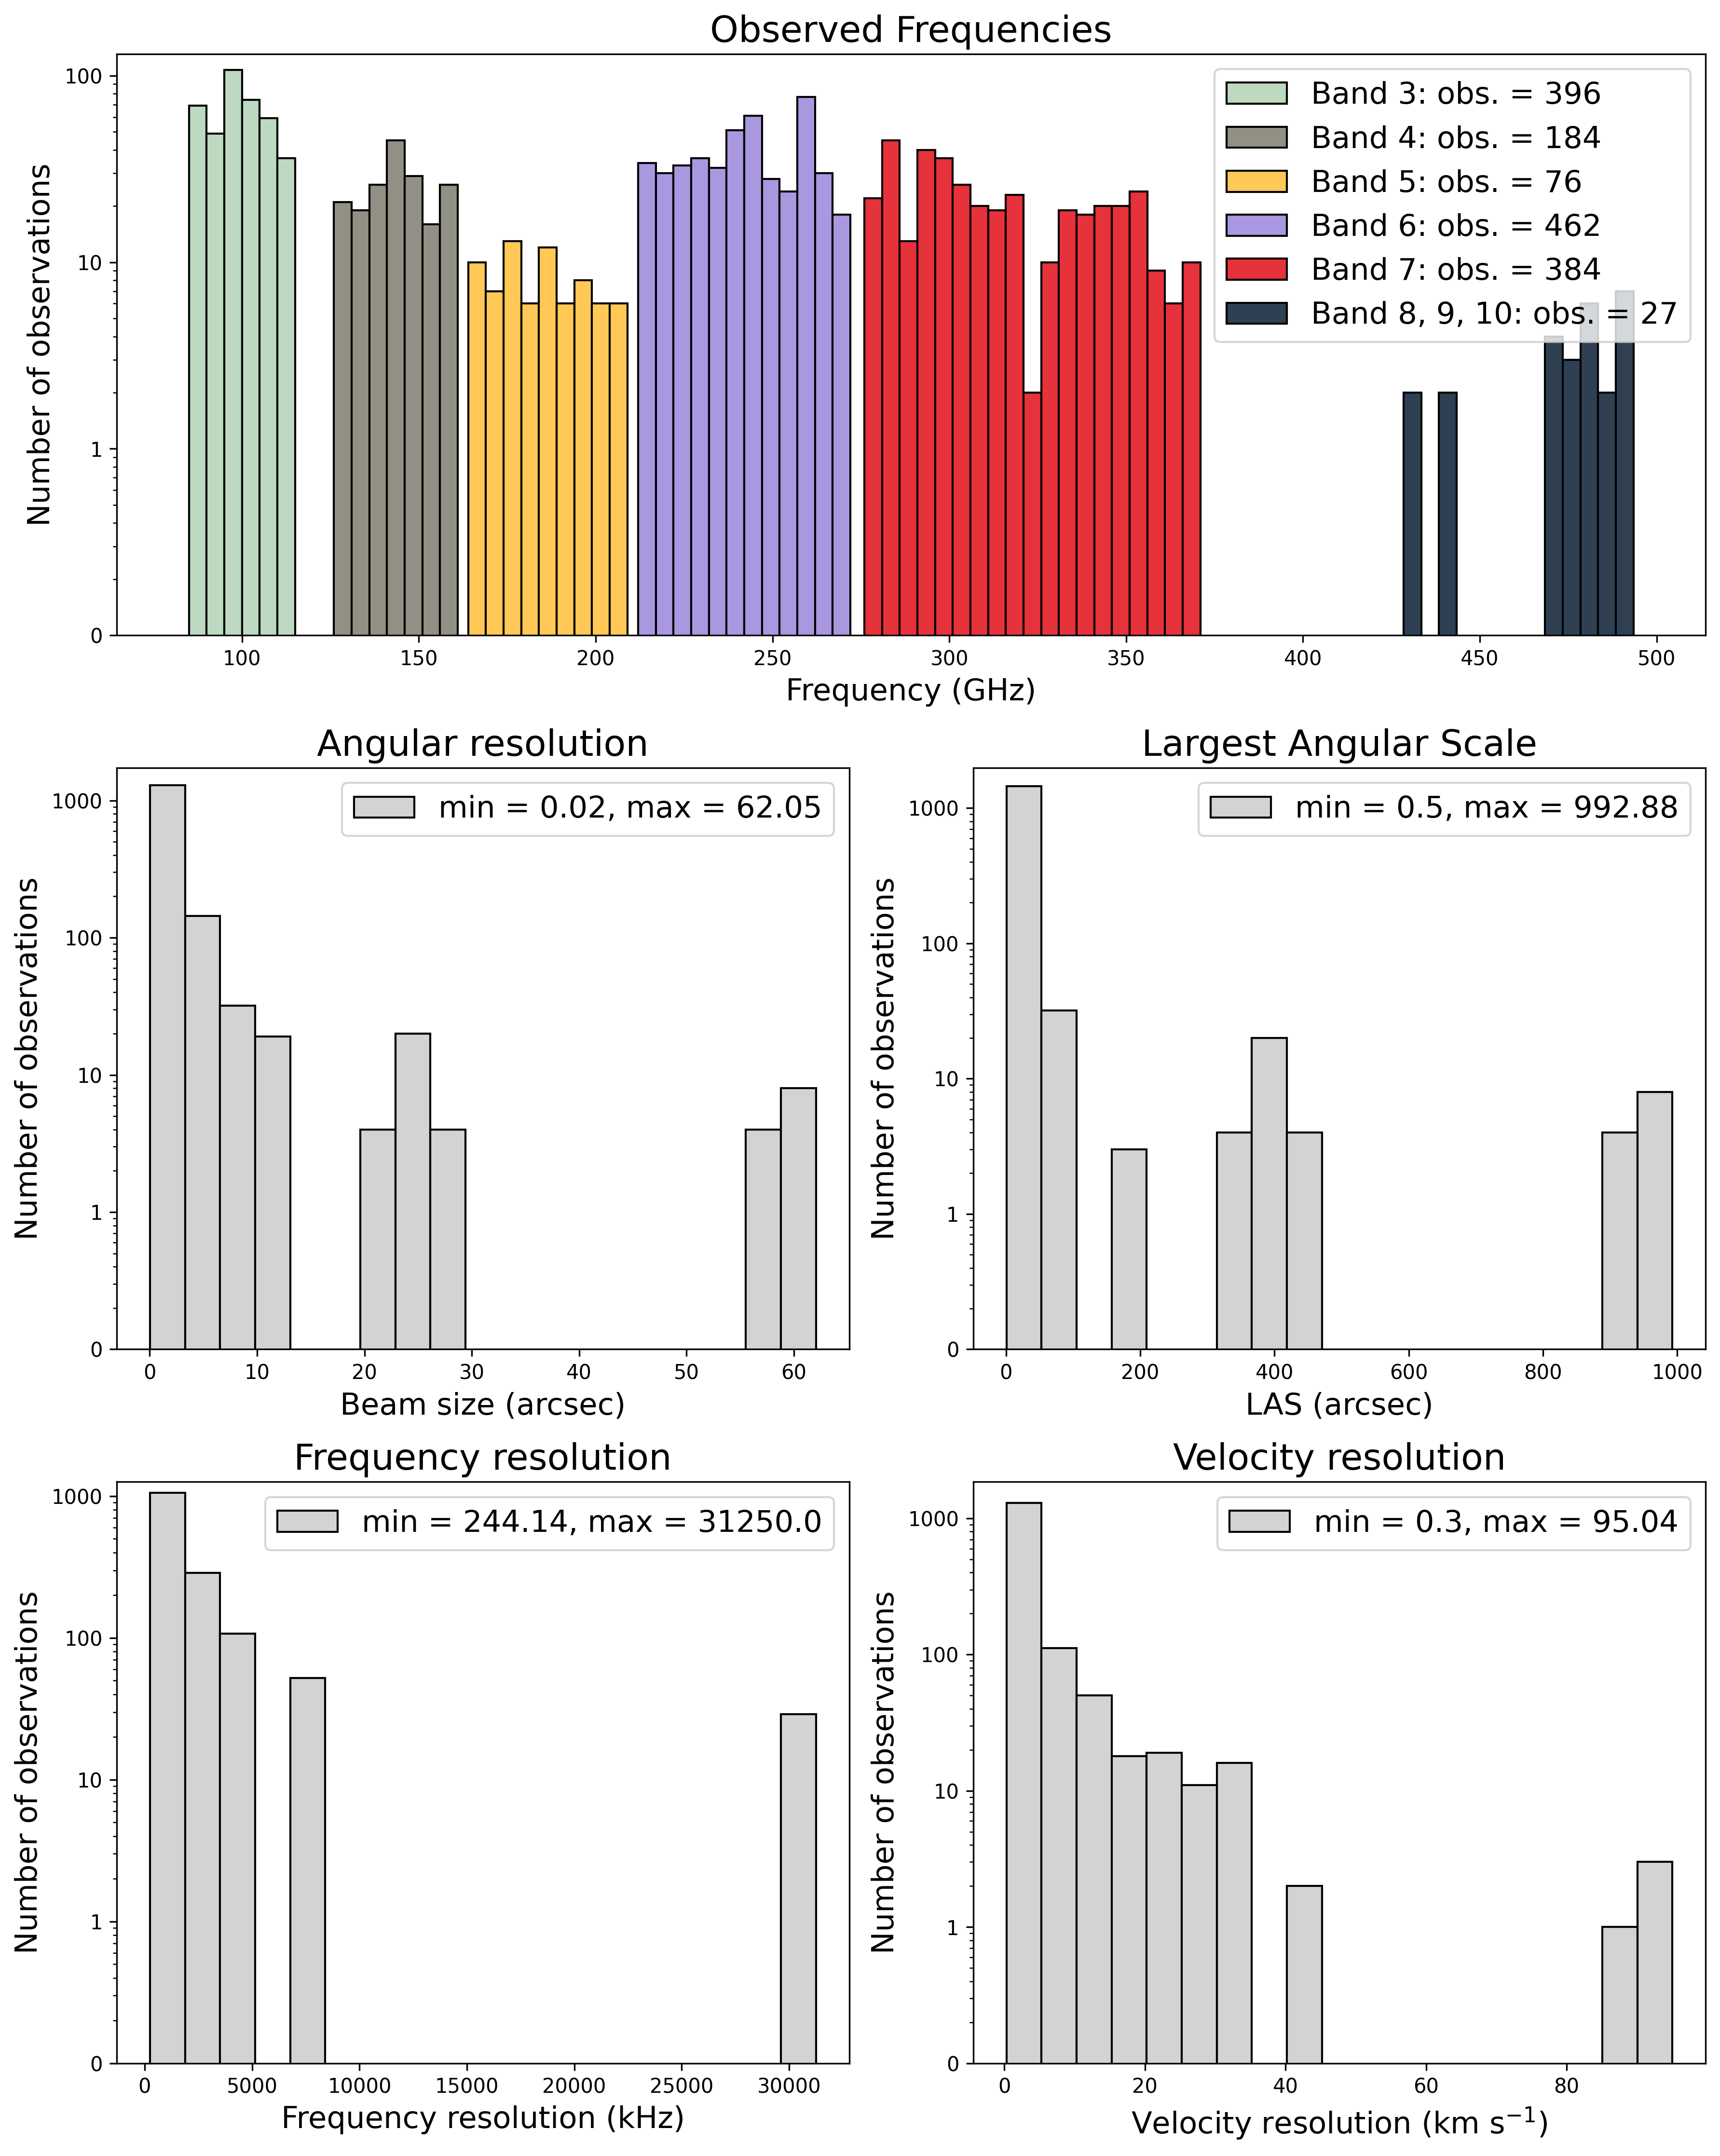

In [47]:
alminer.plot_overview(observations, savefig='alma_galaxy_chemistry')

## 3.2 Plot an overview of a given line in the observations <a name="plot_line_overview"></a>

The `alminer.plot_line_overview` function creates overview plots of observed frequencies, angular resolution, LAS, frequency and velocity resolutions for the input DataFrame, and highlights the observations of a give frequency (redshift if the *z* parameter is set) specified by the user. 

<br>

<details>
<summary style="display:list-item">Details of <code>plot_line_overview</code> function</summary>

* <u>Description</u>: Create overview plots of observed frequencies, angular resolution, LAS, frequency and velocity resolutions, highlighting the observations of a give (redshifted) frequency with hatches on the bar plots. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**plot_line_overview**(_observations, line_freq, z=0., line_name='', showfig=True, savefig=None_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **line_freq (float64)** : Frequency of the line of interest in GHz. <br>
 * **z (float64, optional, default: 0)** : Redshift by which the frequency given in 'line_freq' parameter should be shifted. <br>
 * **line_name (str, optional, default: '')** : Name of the line specified in 'line_freq'. <br>
 * **showfig (bool, optional, default: True)** : Display the plot (*showfig=True*) or not (*showfig=False*). <br>
 * **savefig (str, optional, default: None)** : Filename (without an extension) for the plot to be saved as. Default file extension is PDF. Figure is saved in a subdirectory called 'reports' within the current working directory. If the directory doesn't exist, it will be created. Default quality is dpi=300. <br>
 <br>
***   
</details>

### Example 3.2.1: plot an overview of the observations and highlight observations at a particular frequency

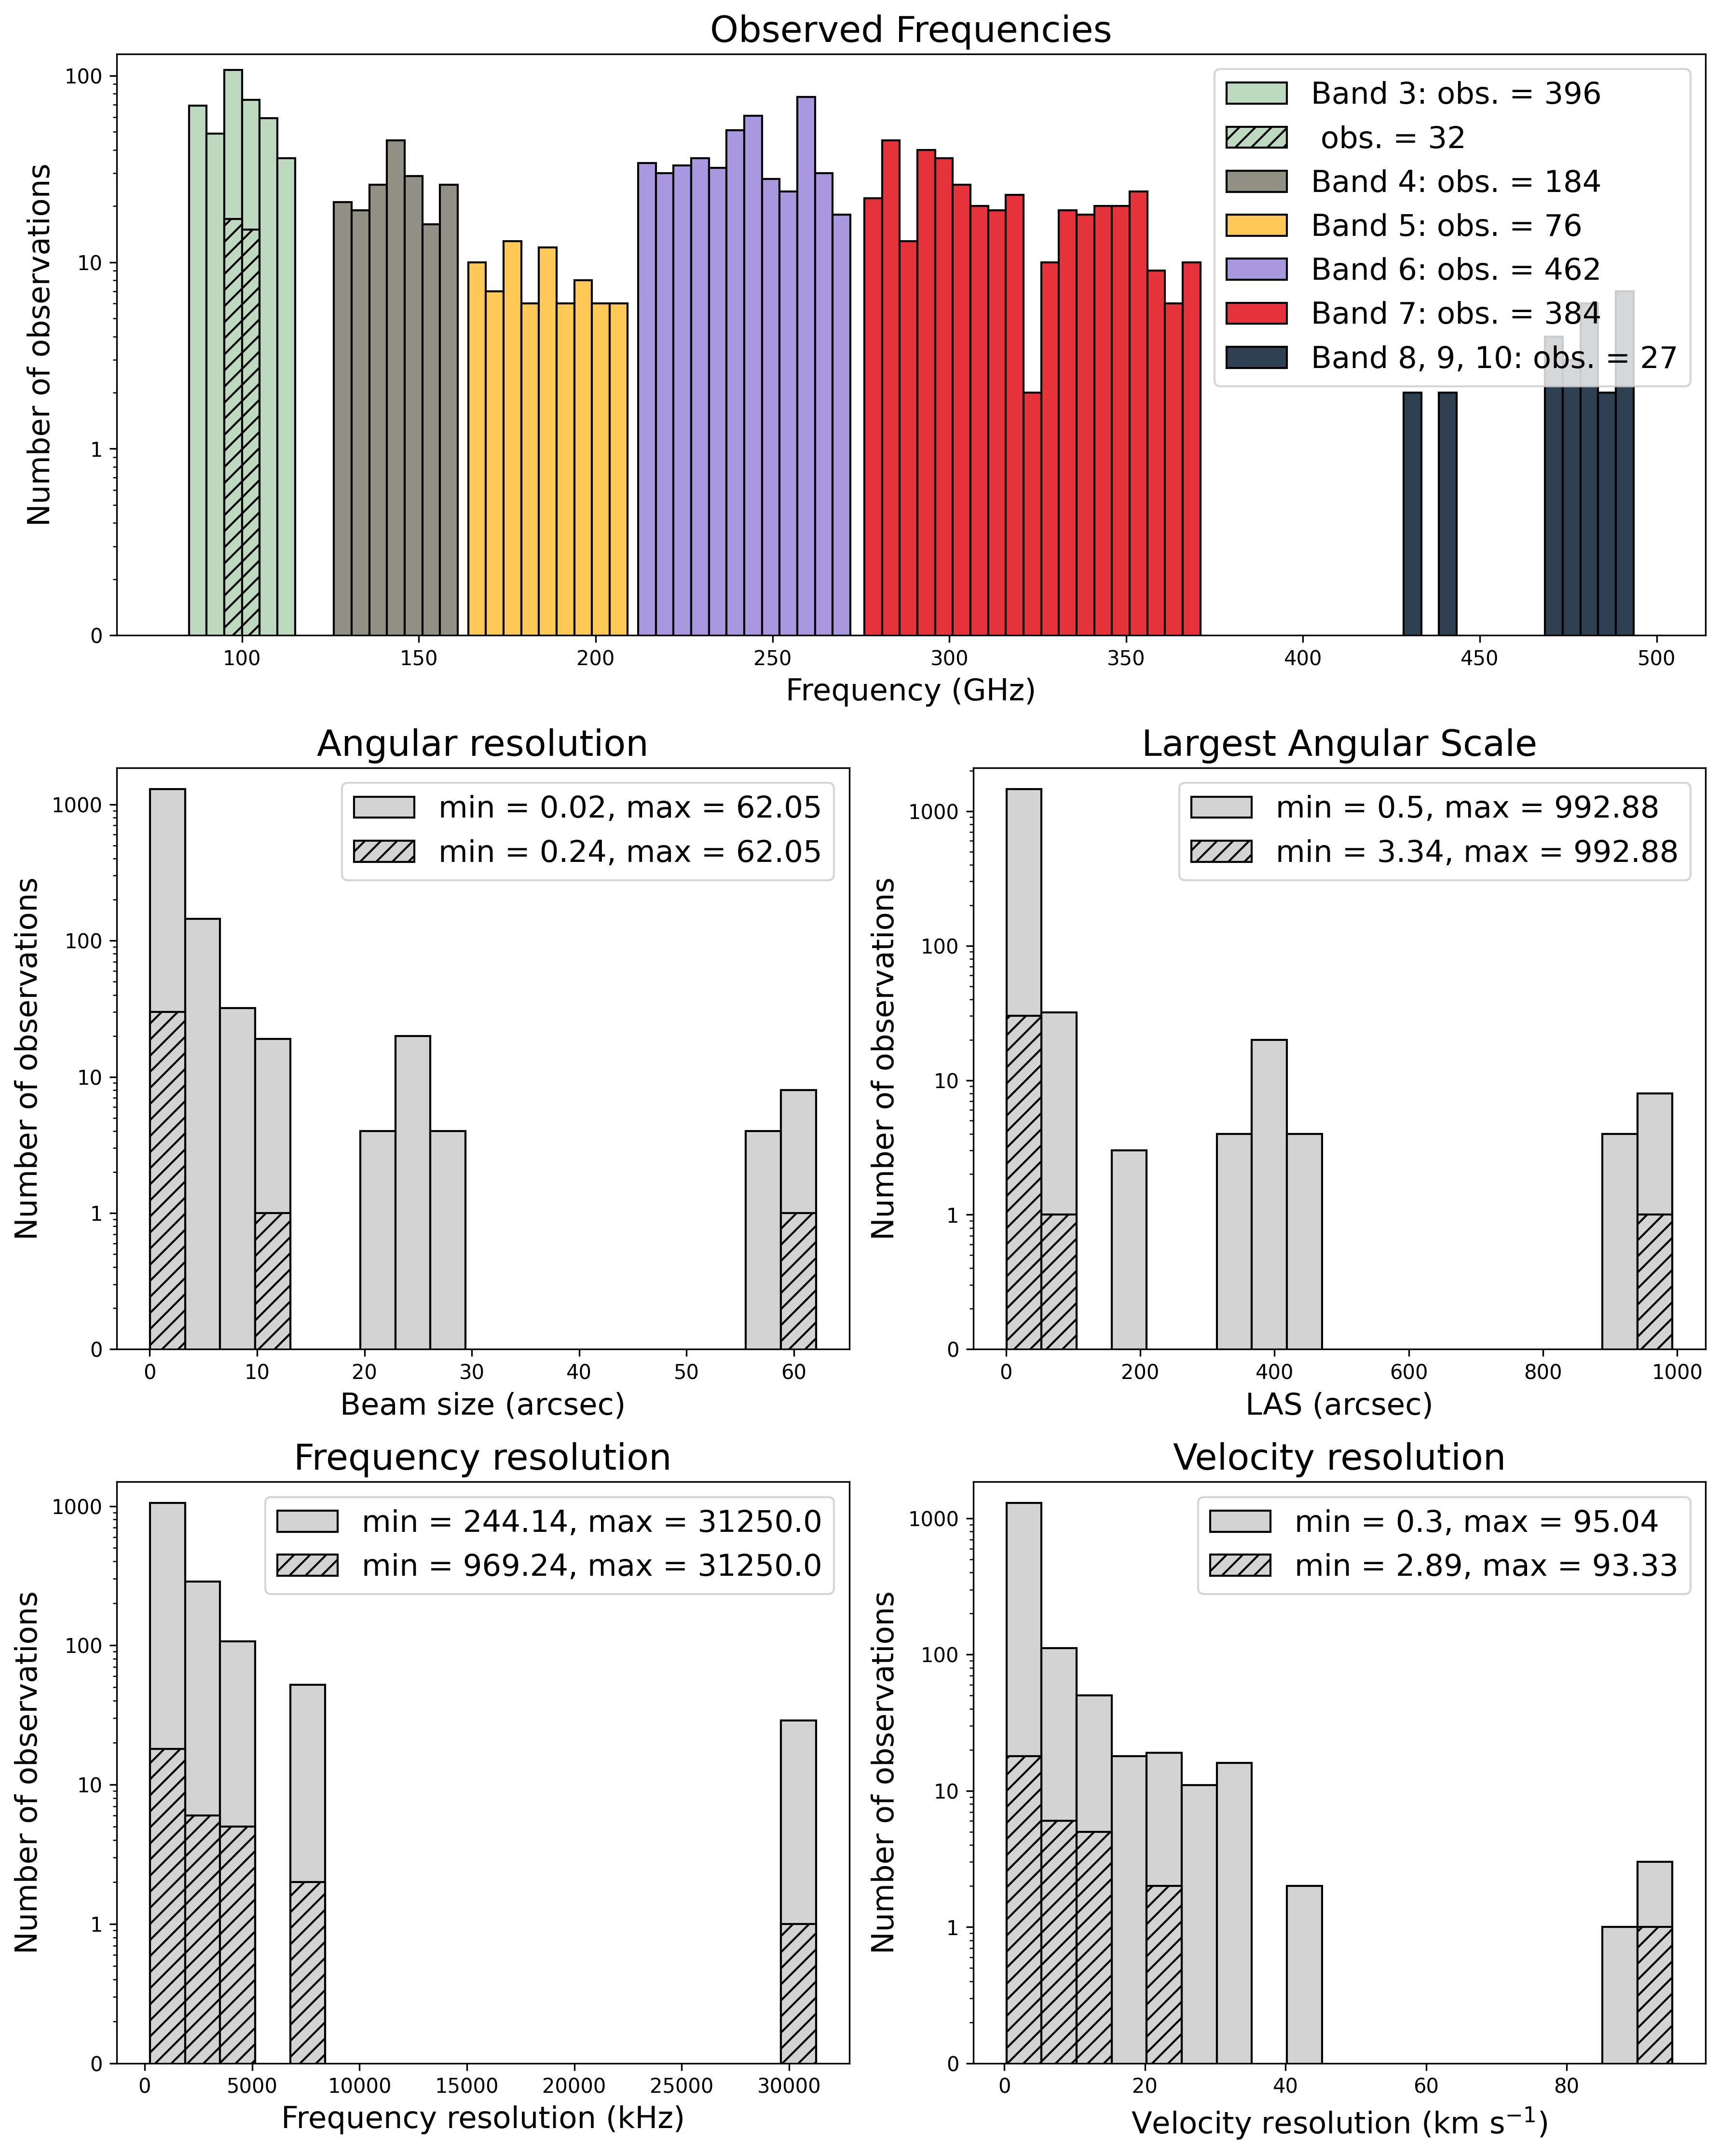

In [28]:
alminer.plot_line_overview(observations, line_freq=100.0)

### Example 3.2.2: plot an overview of the observations and highlight observations at a redshifted frequency

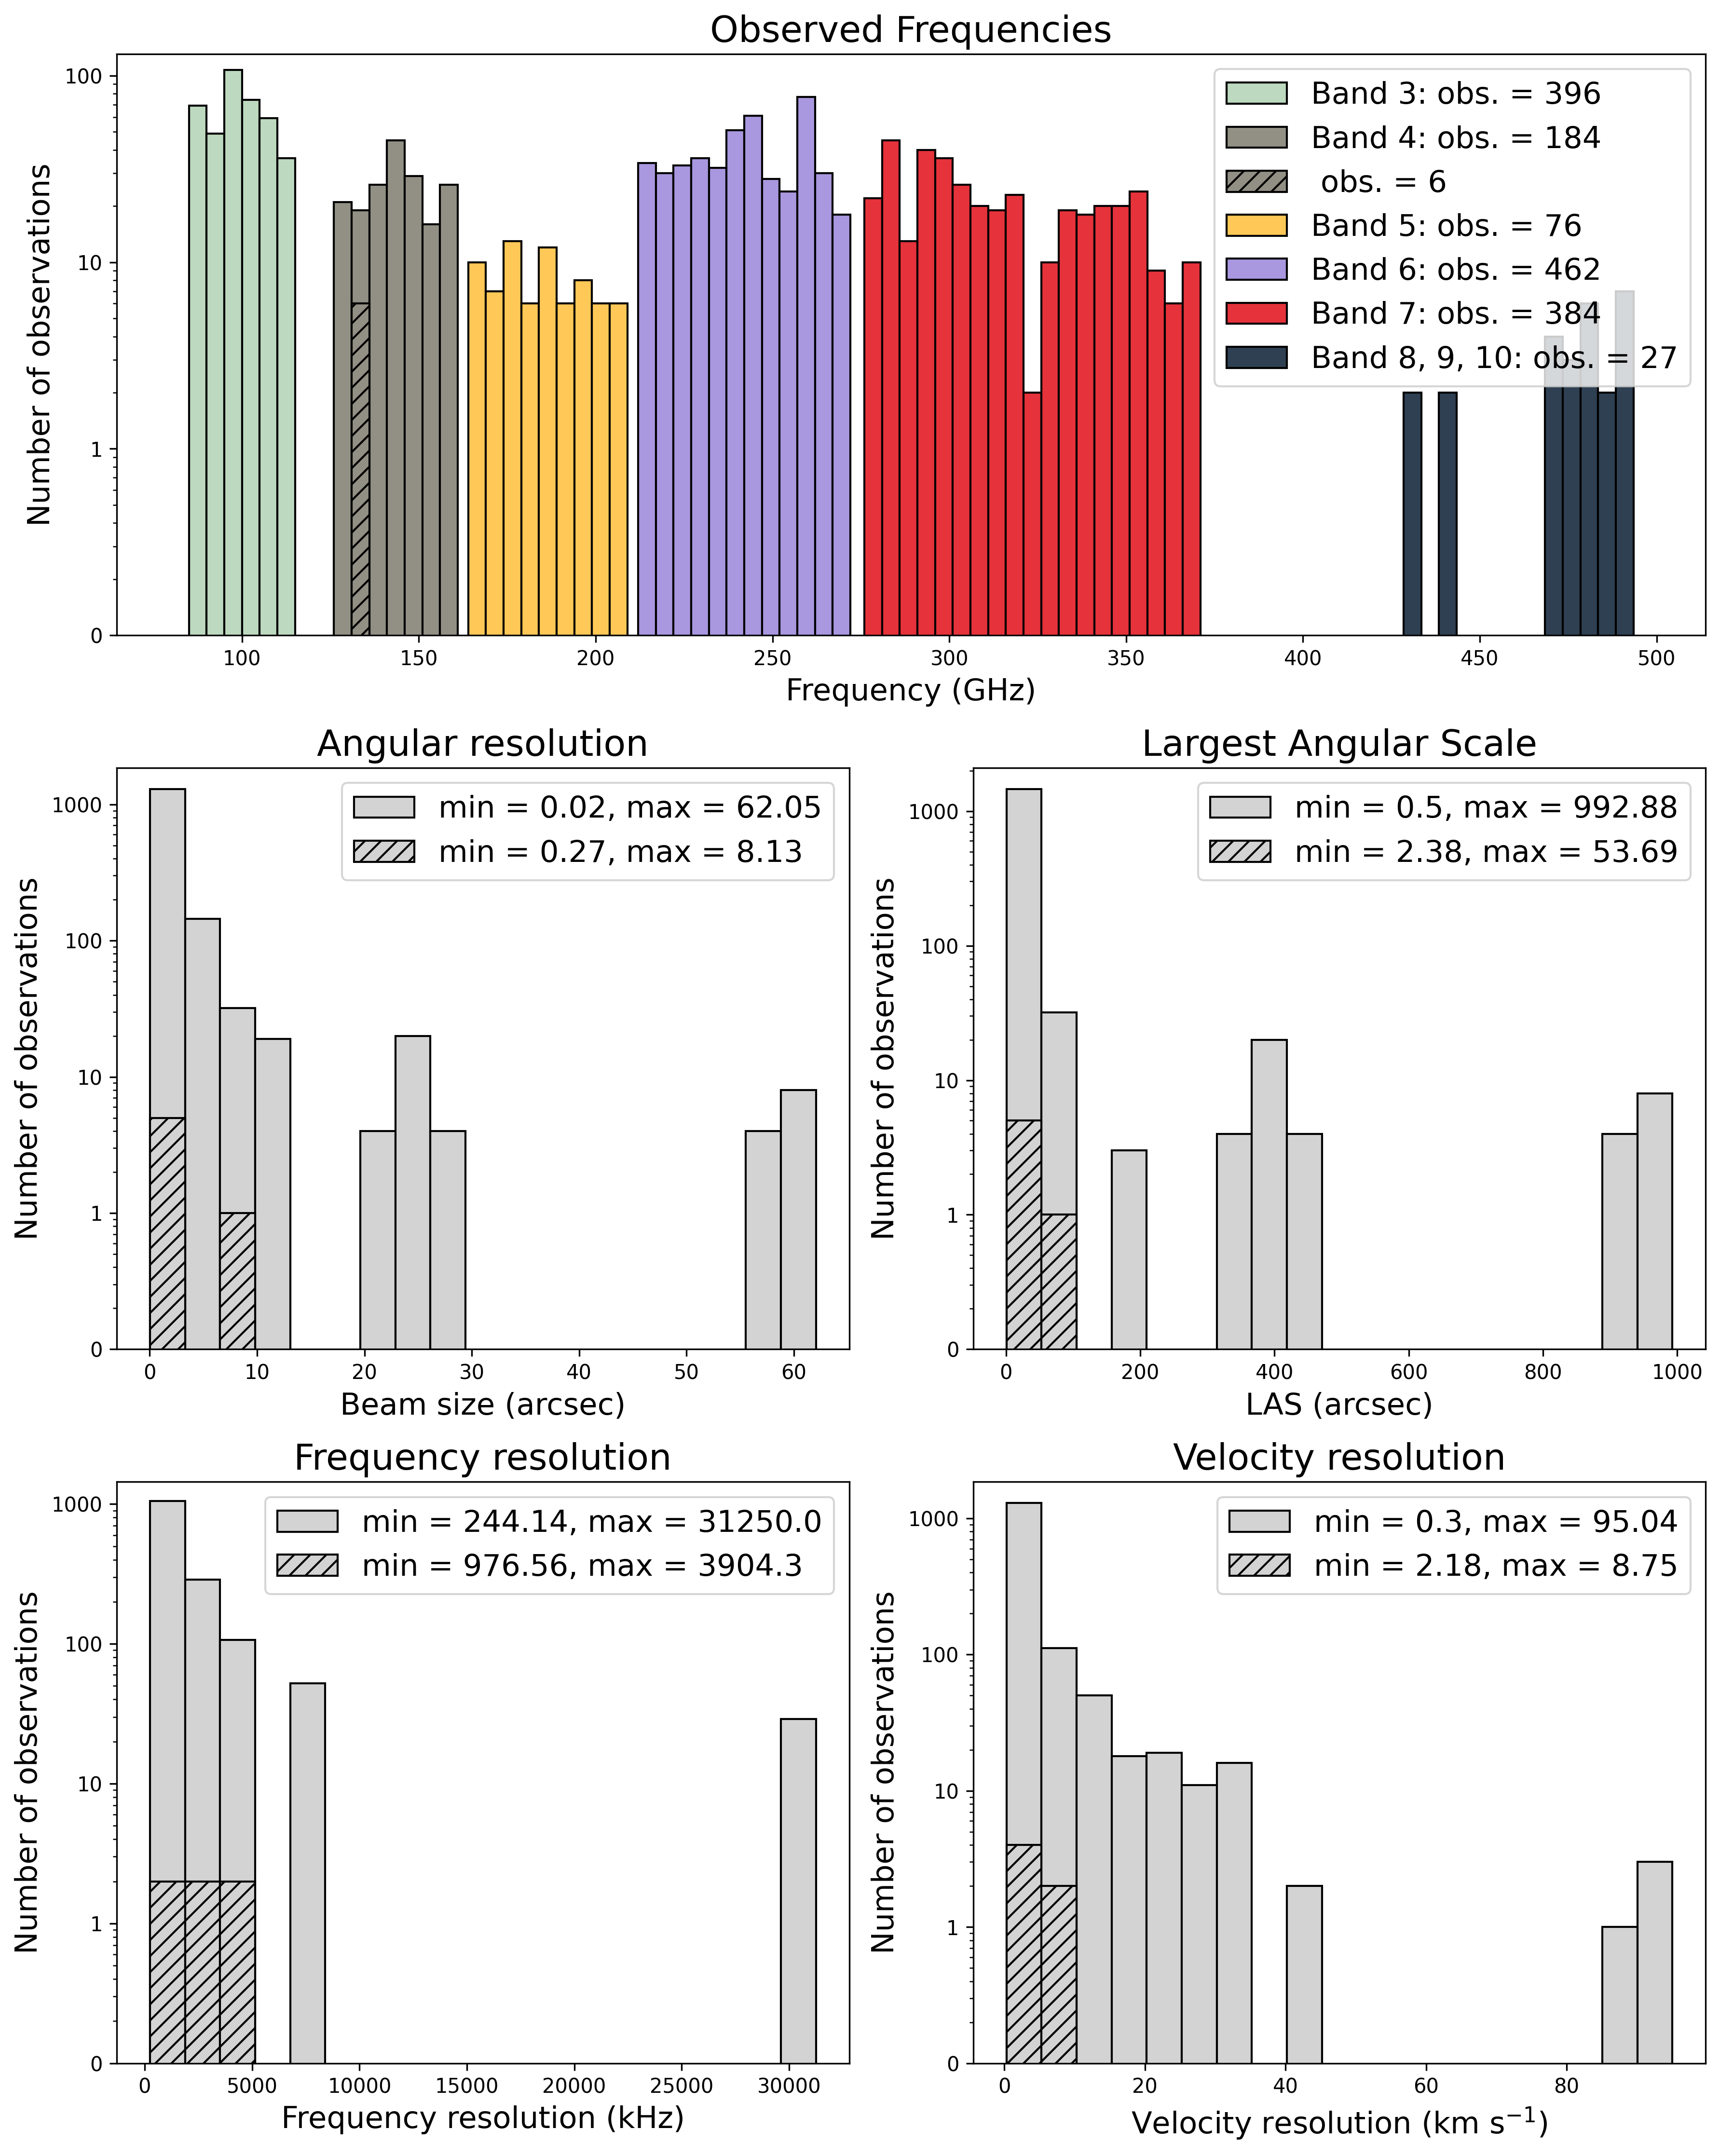

In [29]:
alminer.plot_line_overview(observations, line_freq=400.0, z=2)

## 3.3 Plot observed frequencies in each band <a name="plot_bands"></a>

The `alminer.plot_bands` function creates detailed plots of observed frequencies in each band.

<br>

<details>
<summary style="display:list-item">Details of <code>plot_bands</code> function</summary>

* <u>Description</u>: Create overview and detailed plots of observed frequencies in each band. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**plot_bands**(_observations, mark_freq='', z=0., mark_CO=False, showfig=True, savefig=None_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **mark_freq (list of float64, optional, default: '')** : A list of frequencies to mark on the plot with dashed lines. <br>
 * **z (float64, optional, default: 0)** : Redshift by which the frequencies given in 'mark_freq' and 'mark_CO' parameters should be shifted. Currently only one redshift can be given for all targets. <br>
 * **mark_CO (bool, optional, default: False)** : mark CO, <sup>13</sup>CO, and C<sup>18</sup>O frequencies on the plot with dashed lines. <br>
 * **showfig (bool, optional, default: True)** : Display the plot (*showfig=True*) or not (*showfig=False*). <br>
 * **savefig (str, optional, default: None)** : Filename (without an extension) for the plot to be saved as. Default file extension is PDF. Figure is saved in a subdirectory called 'reports' within the current working directory. If the directory doesn't exist, it will be created. Default quality is dpi=300. <br>
 <br>
***
</details>

### Example 3.3.1: plot observed frequencies in each band and mark redshifted CO lines

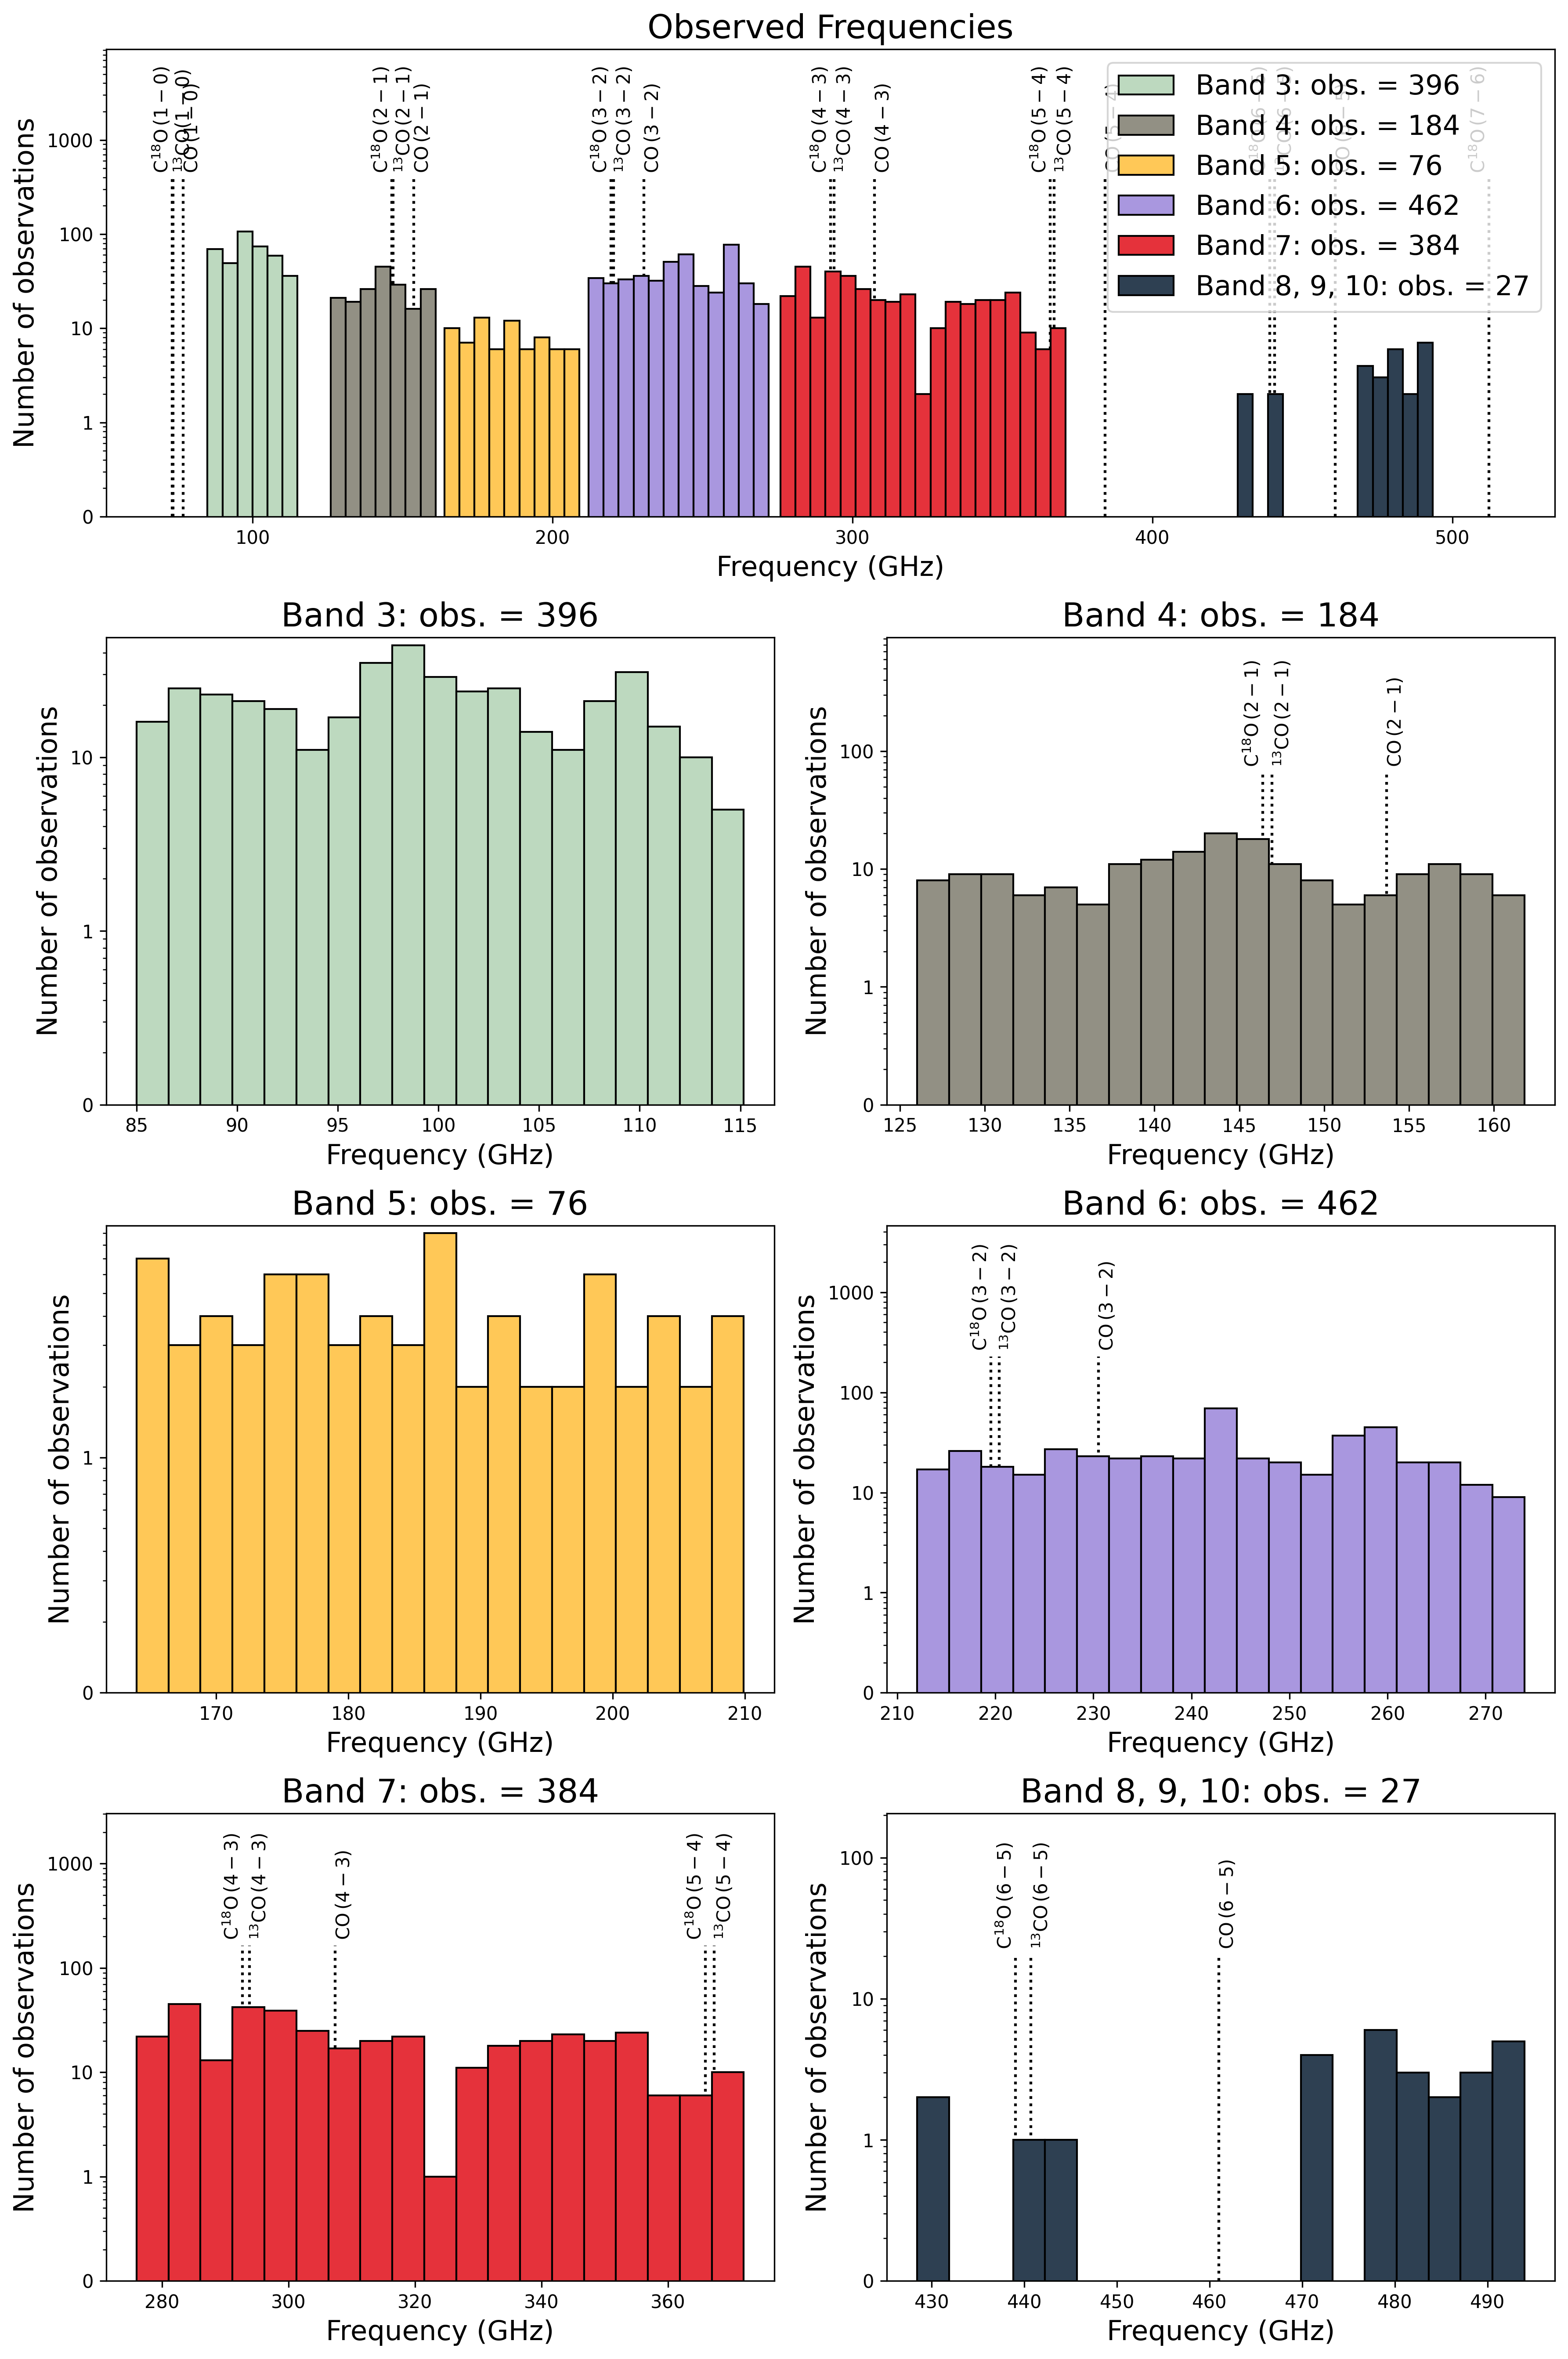

In [30]:
alminer.plot_bands(observations, mark_CO=True, z=0.5)

### Example 3.3.2: plot observed frequencies in each band and mark frequencies of choice

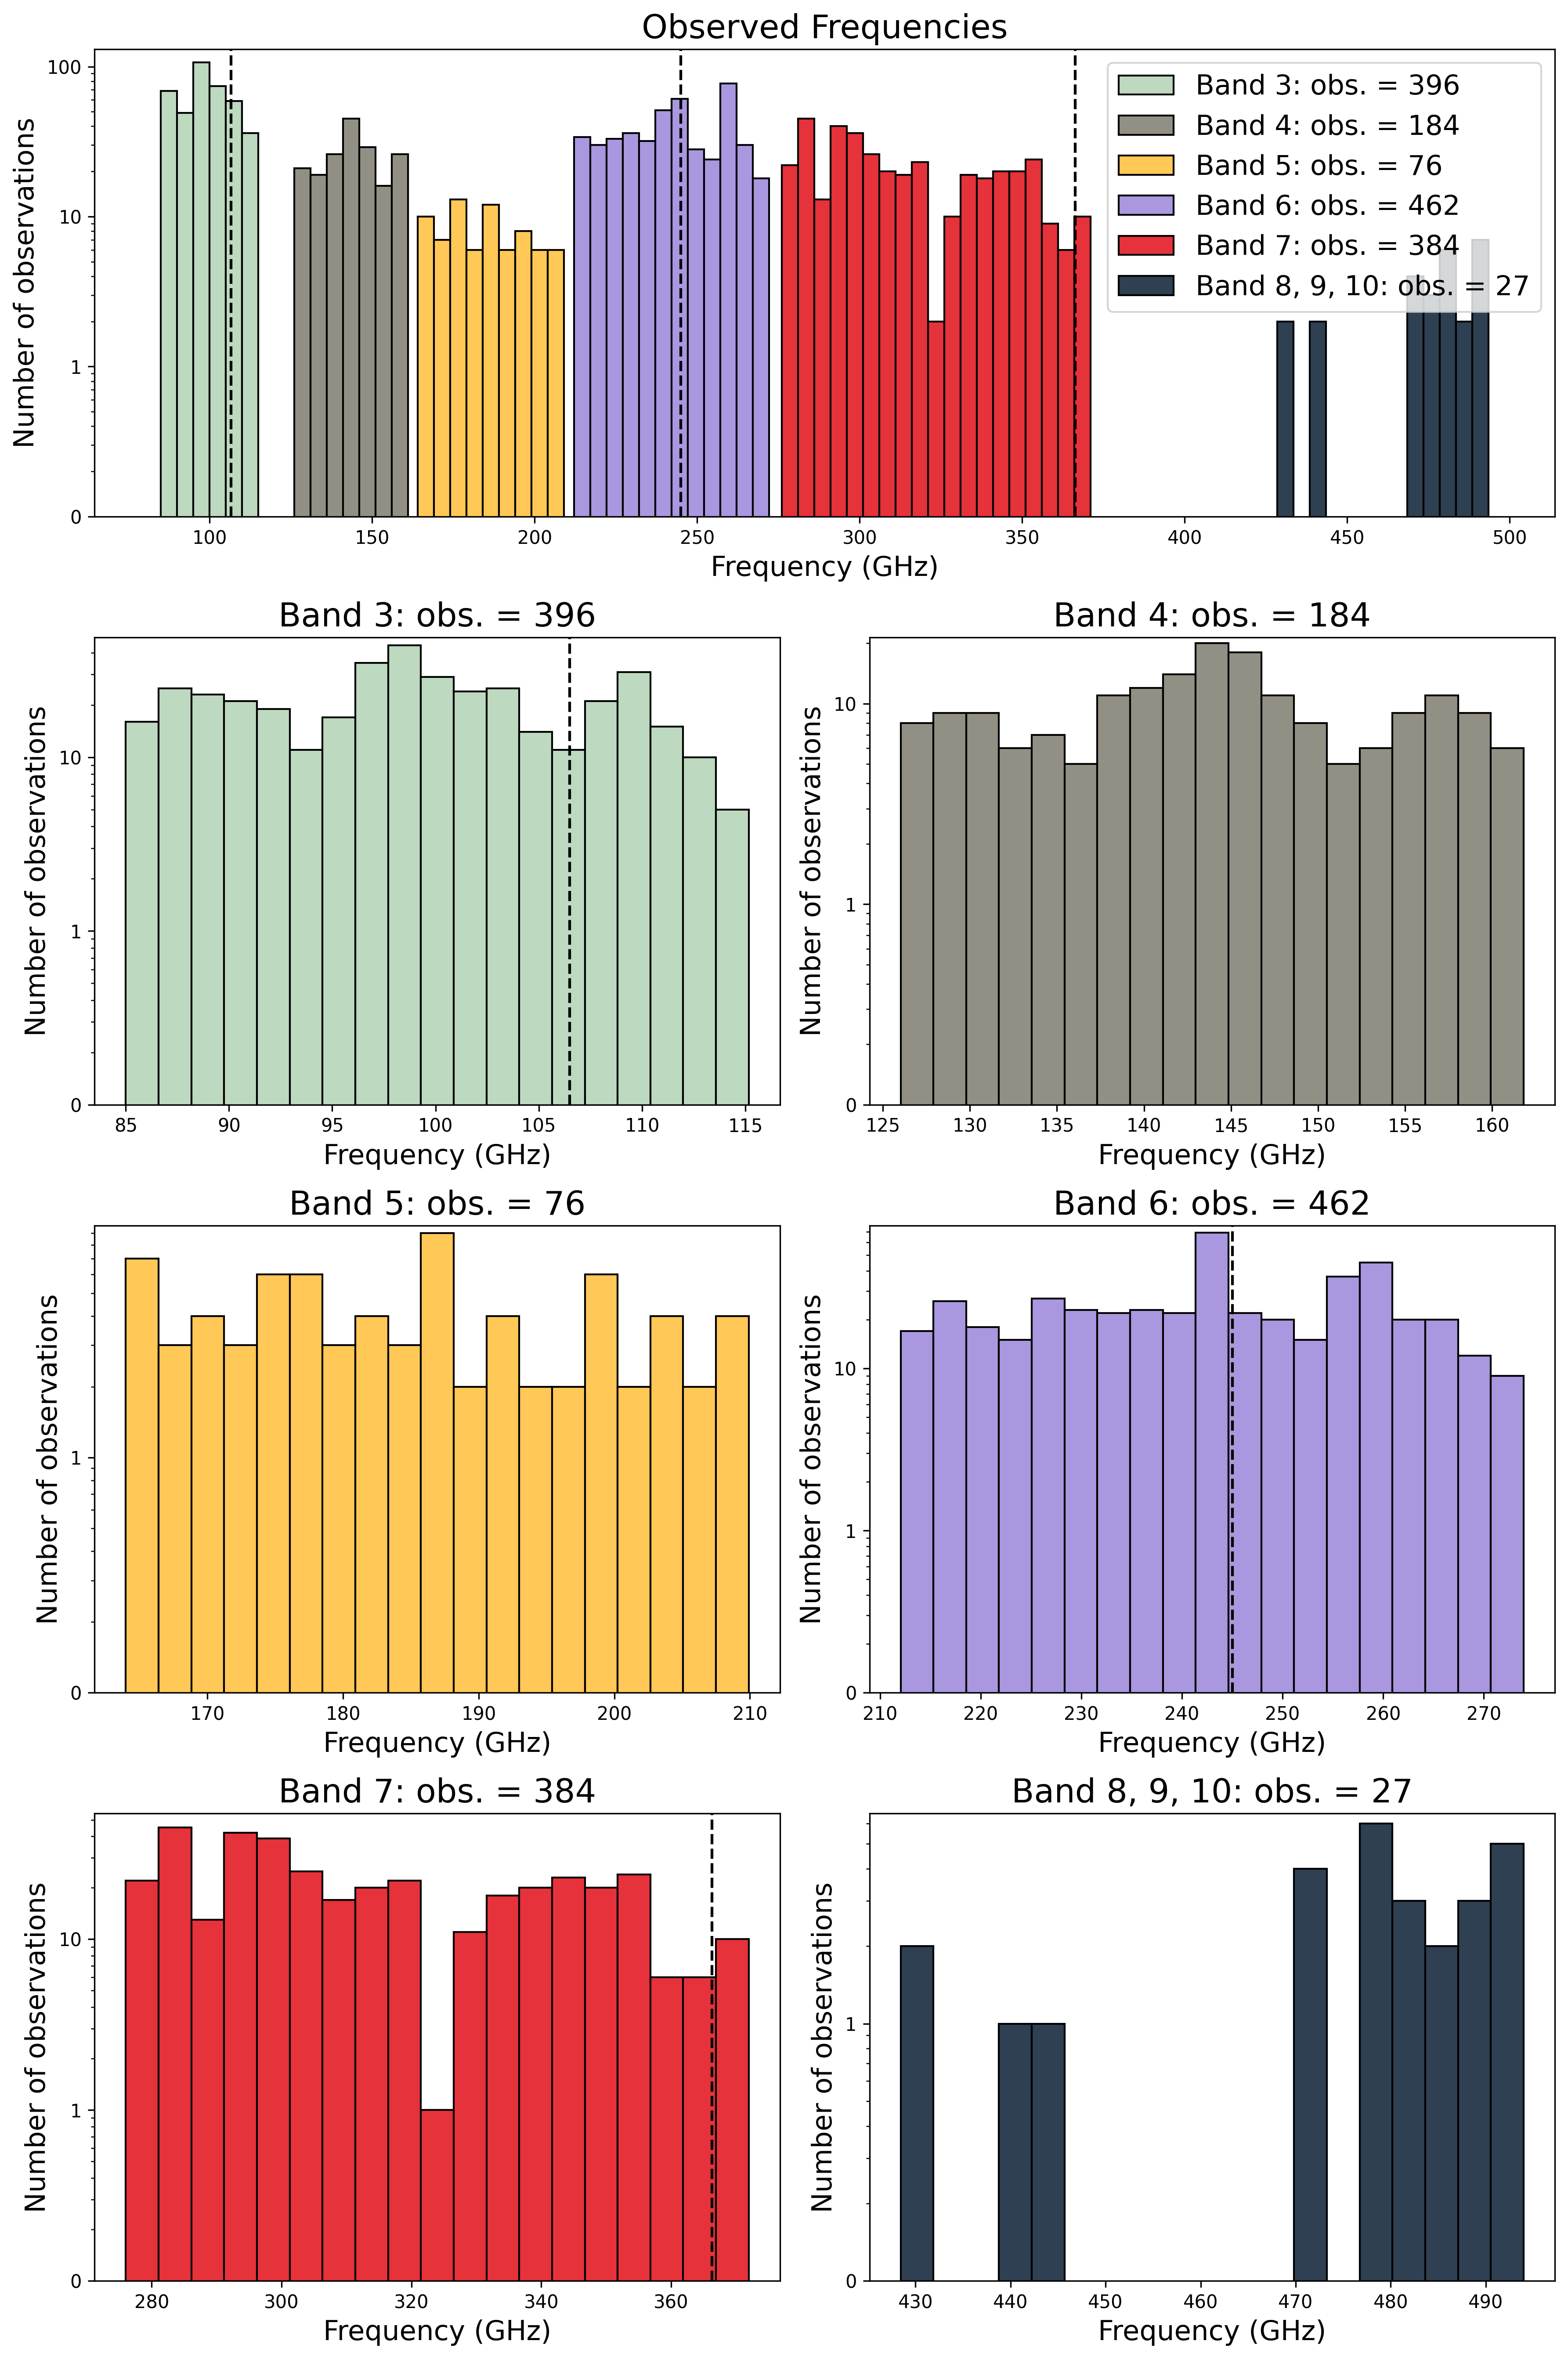

In [31]:
alminer.plot_bands(observations, mark_freq=[106.5, 245.0, 366.3])

## 3.4 Plot observed frequencies in each band <a name="plot_observations"></a>

The `alminer.plot_observations` function creates a detailed plot of observations in each band showing the exact observed frequency ranges. Observation numbers are the input DataFrame's index values. 

<br>

<details>
<summary style="display:list-item">Details of <code>plot_observations</code> function</summary>

* <u>Description</u>: Create detailed plots of observations in each band. The x-axis displays the observation number 'Obs' column in the input DataFrame. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**plot_observations**(_observations, mark_freq='', z=0., mark_CO=False, showfig=True, savefig=None_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **mark_freq (list of float64, optional, default: '')** : A list of frequencies to mark on the plot with dashed lines. <br>
 * **z (float64, optional, default: 0)** : Redshift by which the frequencies given in 'mark_freq' and 'mark_CO' parameters should be shifted. Currently only one redshift can be given for all targets. <br>
 * **mark_CO (bool, optional, default: False)** : mark CO, <sup>13</sup>CO, and C<sup>18</sup>O frequencies on the plot with dashed lines. <br>
 * **showfig (bool, optional, default: True)** : Display the plot (*showfig=True*) or not (*showfig=False*). <br>
 * **savefig (str, optional, default: None)** : Filename (without an extension) for the plot to be saved as. Default file extension is PDF. Figure is saved in a subdirectory called 'reports' within the current working directory. If the directory doesn't exist, it will be created. Default quality is dpi=300. <br>
 <br>
***
</details>

### Example 3.4.1: plot observed frequencies in each band and mark CO lines

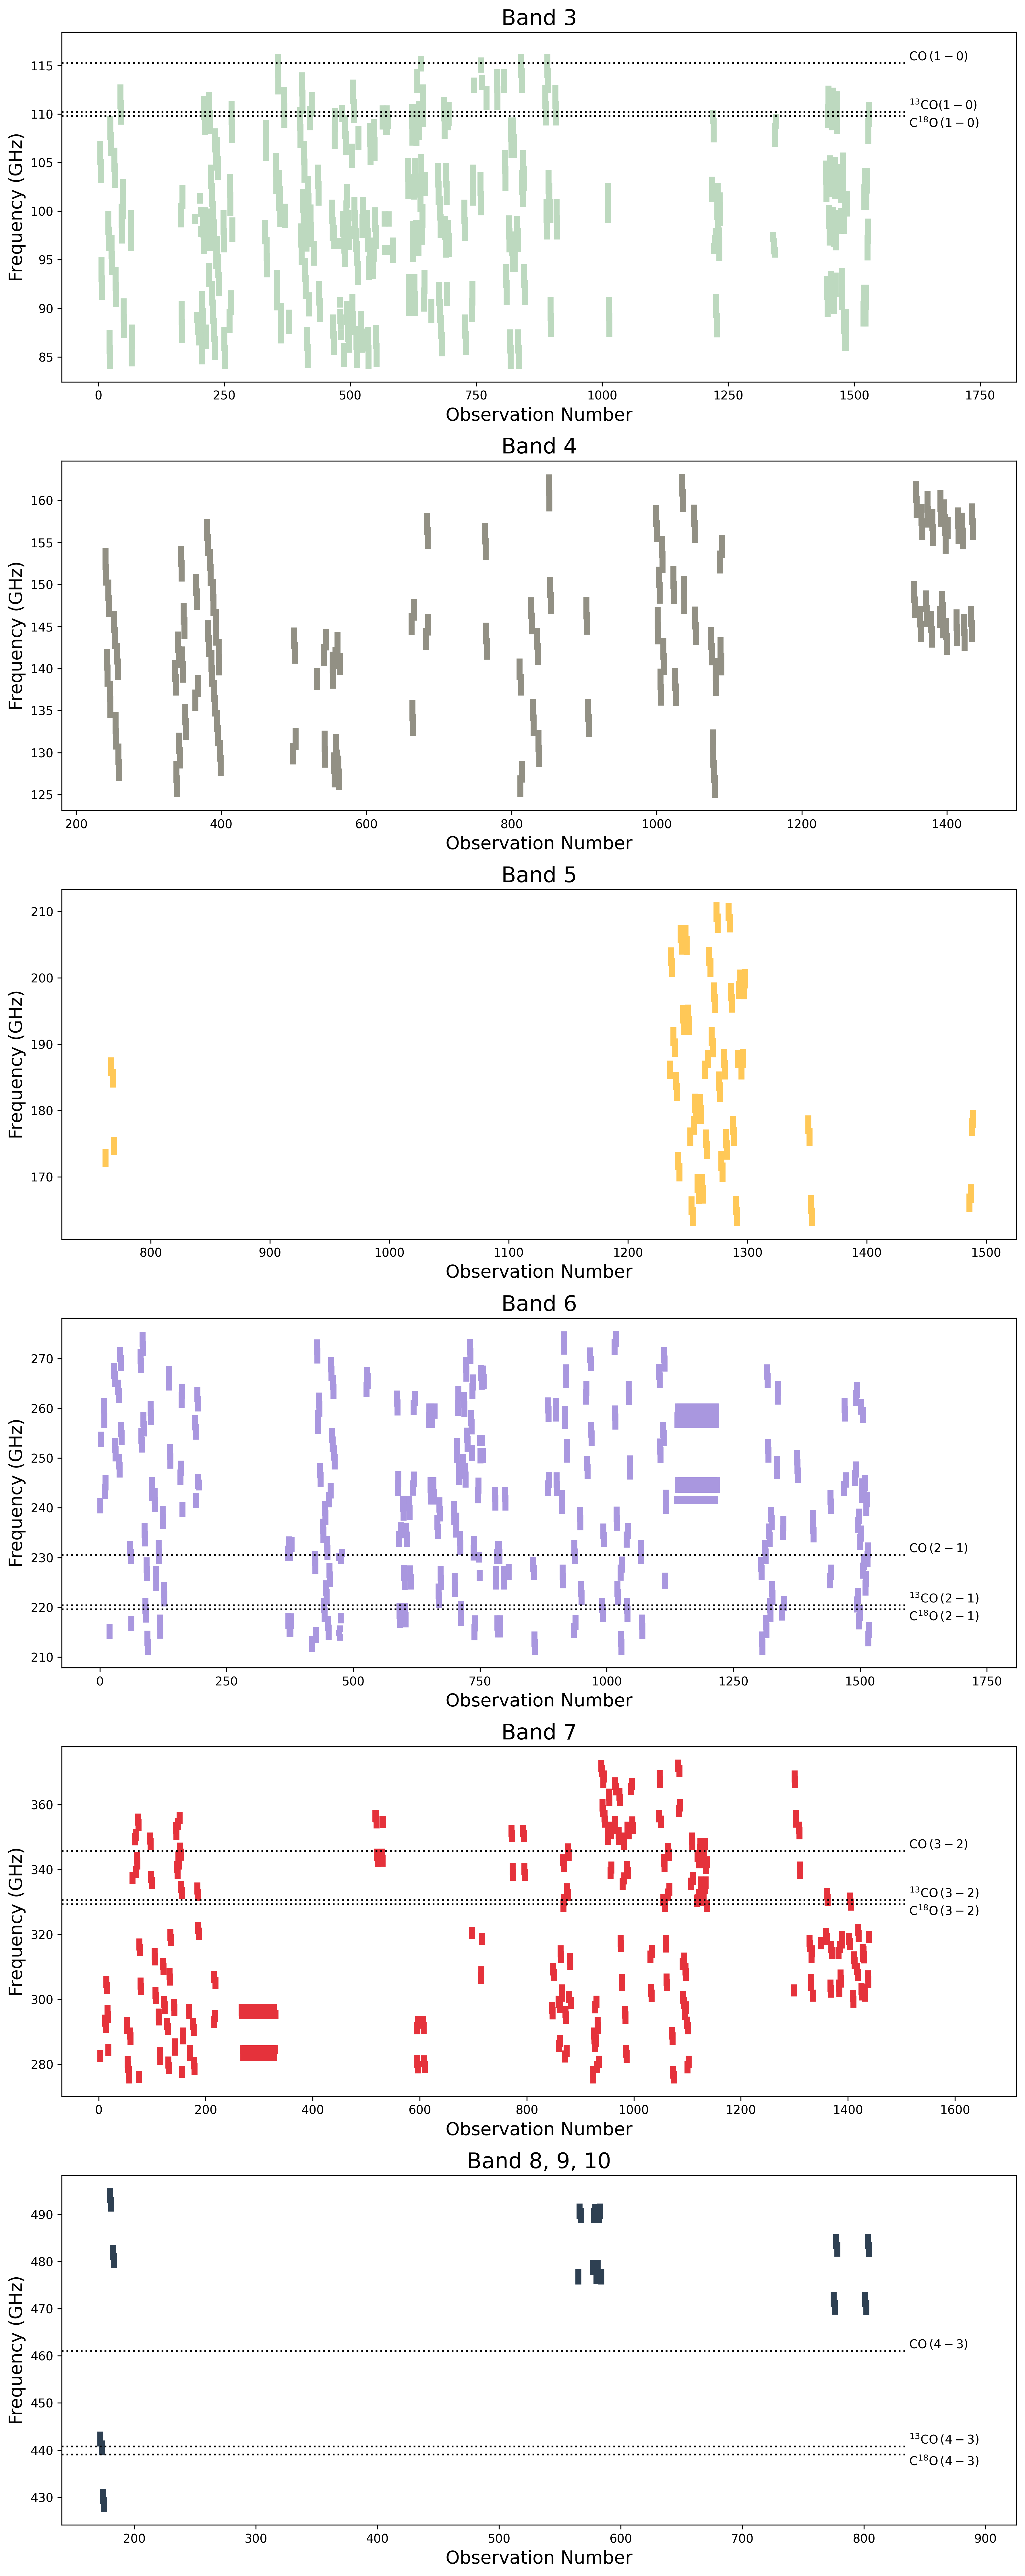

In [32]:
alminer.plot_observations(observations, mark_CO=True)

### Example 3.4.2: plot observed frequencies and mark frequencies of choice

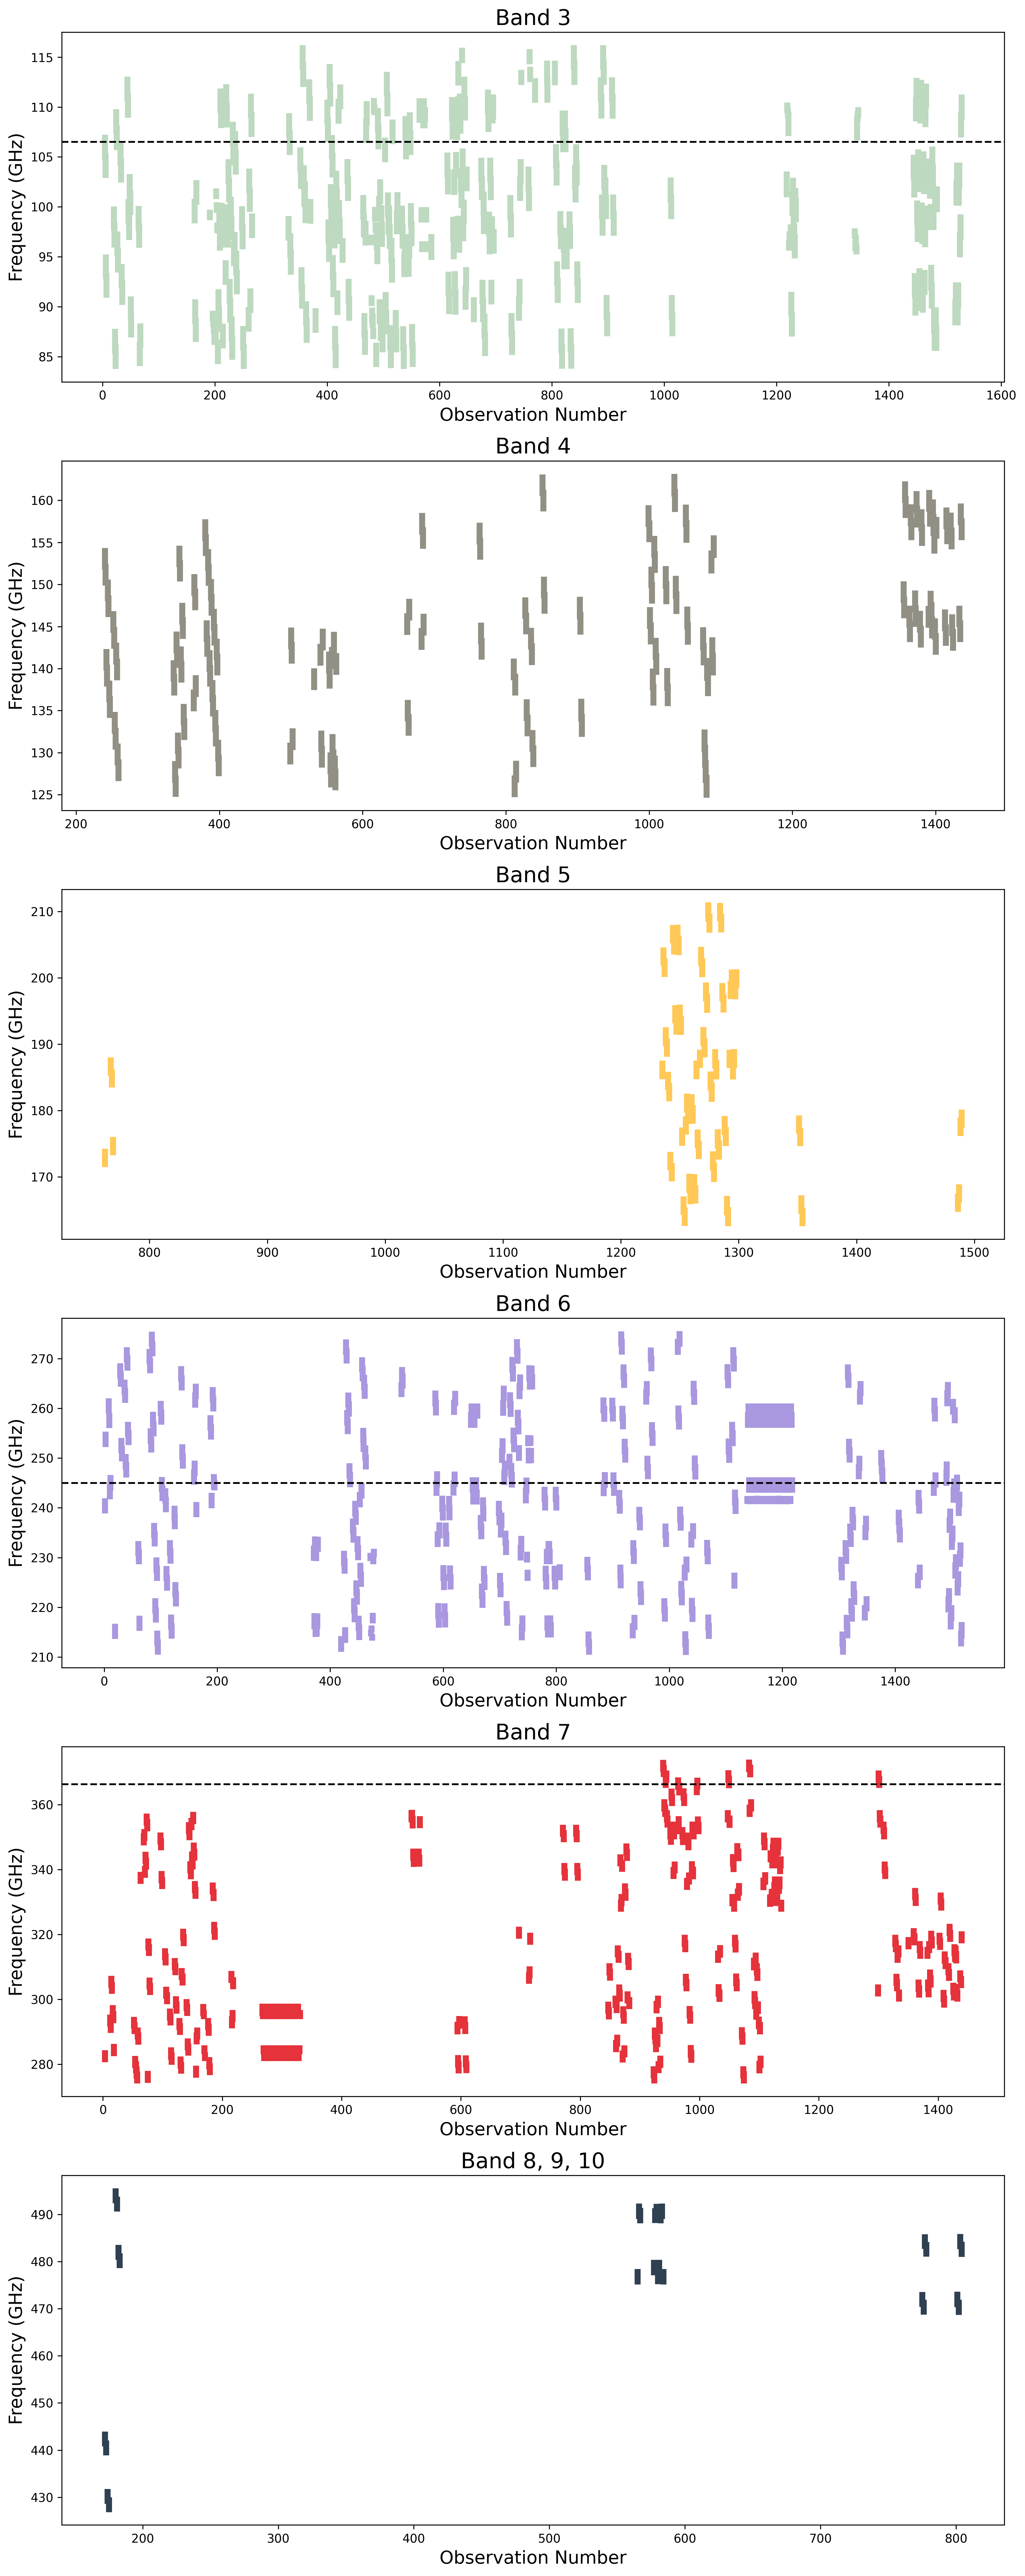

In [33]:
alminer.plot_observations(observations, mark_freq=[106.5, 245.0, 366.3])

## 3.5 Plot sky distribution <a name="plot_sky"></a>

The `alminer.plot_sky` function creates a plot of the distribution of targets on the sky.

<br>

<details>
<summary style="display:list-item">Details of <code>plot_sky</code> function</summary>
    
* <u>Description</u>: Plot the distribution of the targets on the sky. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**plot_sky**(_observations, showfig=True, savefig=None_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **showfig (bool, optional, default: True)** : Display the plot (*showfig=True*) or not (*showfig=False*). <br>
 * **savefig (str, optional, default: None)** : Filename (without an extension) for the plot to be saved as. Default file extension is PDF. Figure is saved in a subdirectory called 'reports' within the current working directory. If the directory doesn't exist, it will be created. Default quality is dpi=300. <br>
 <br>
***  
</details>

### Example 3.5.1: plot sky distribution

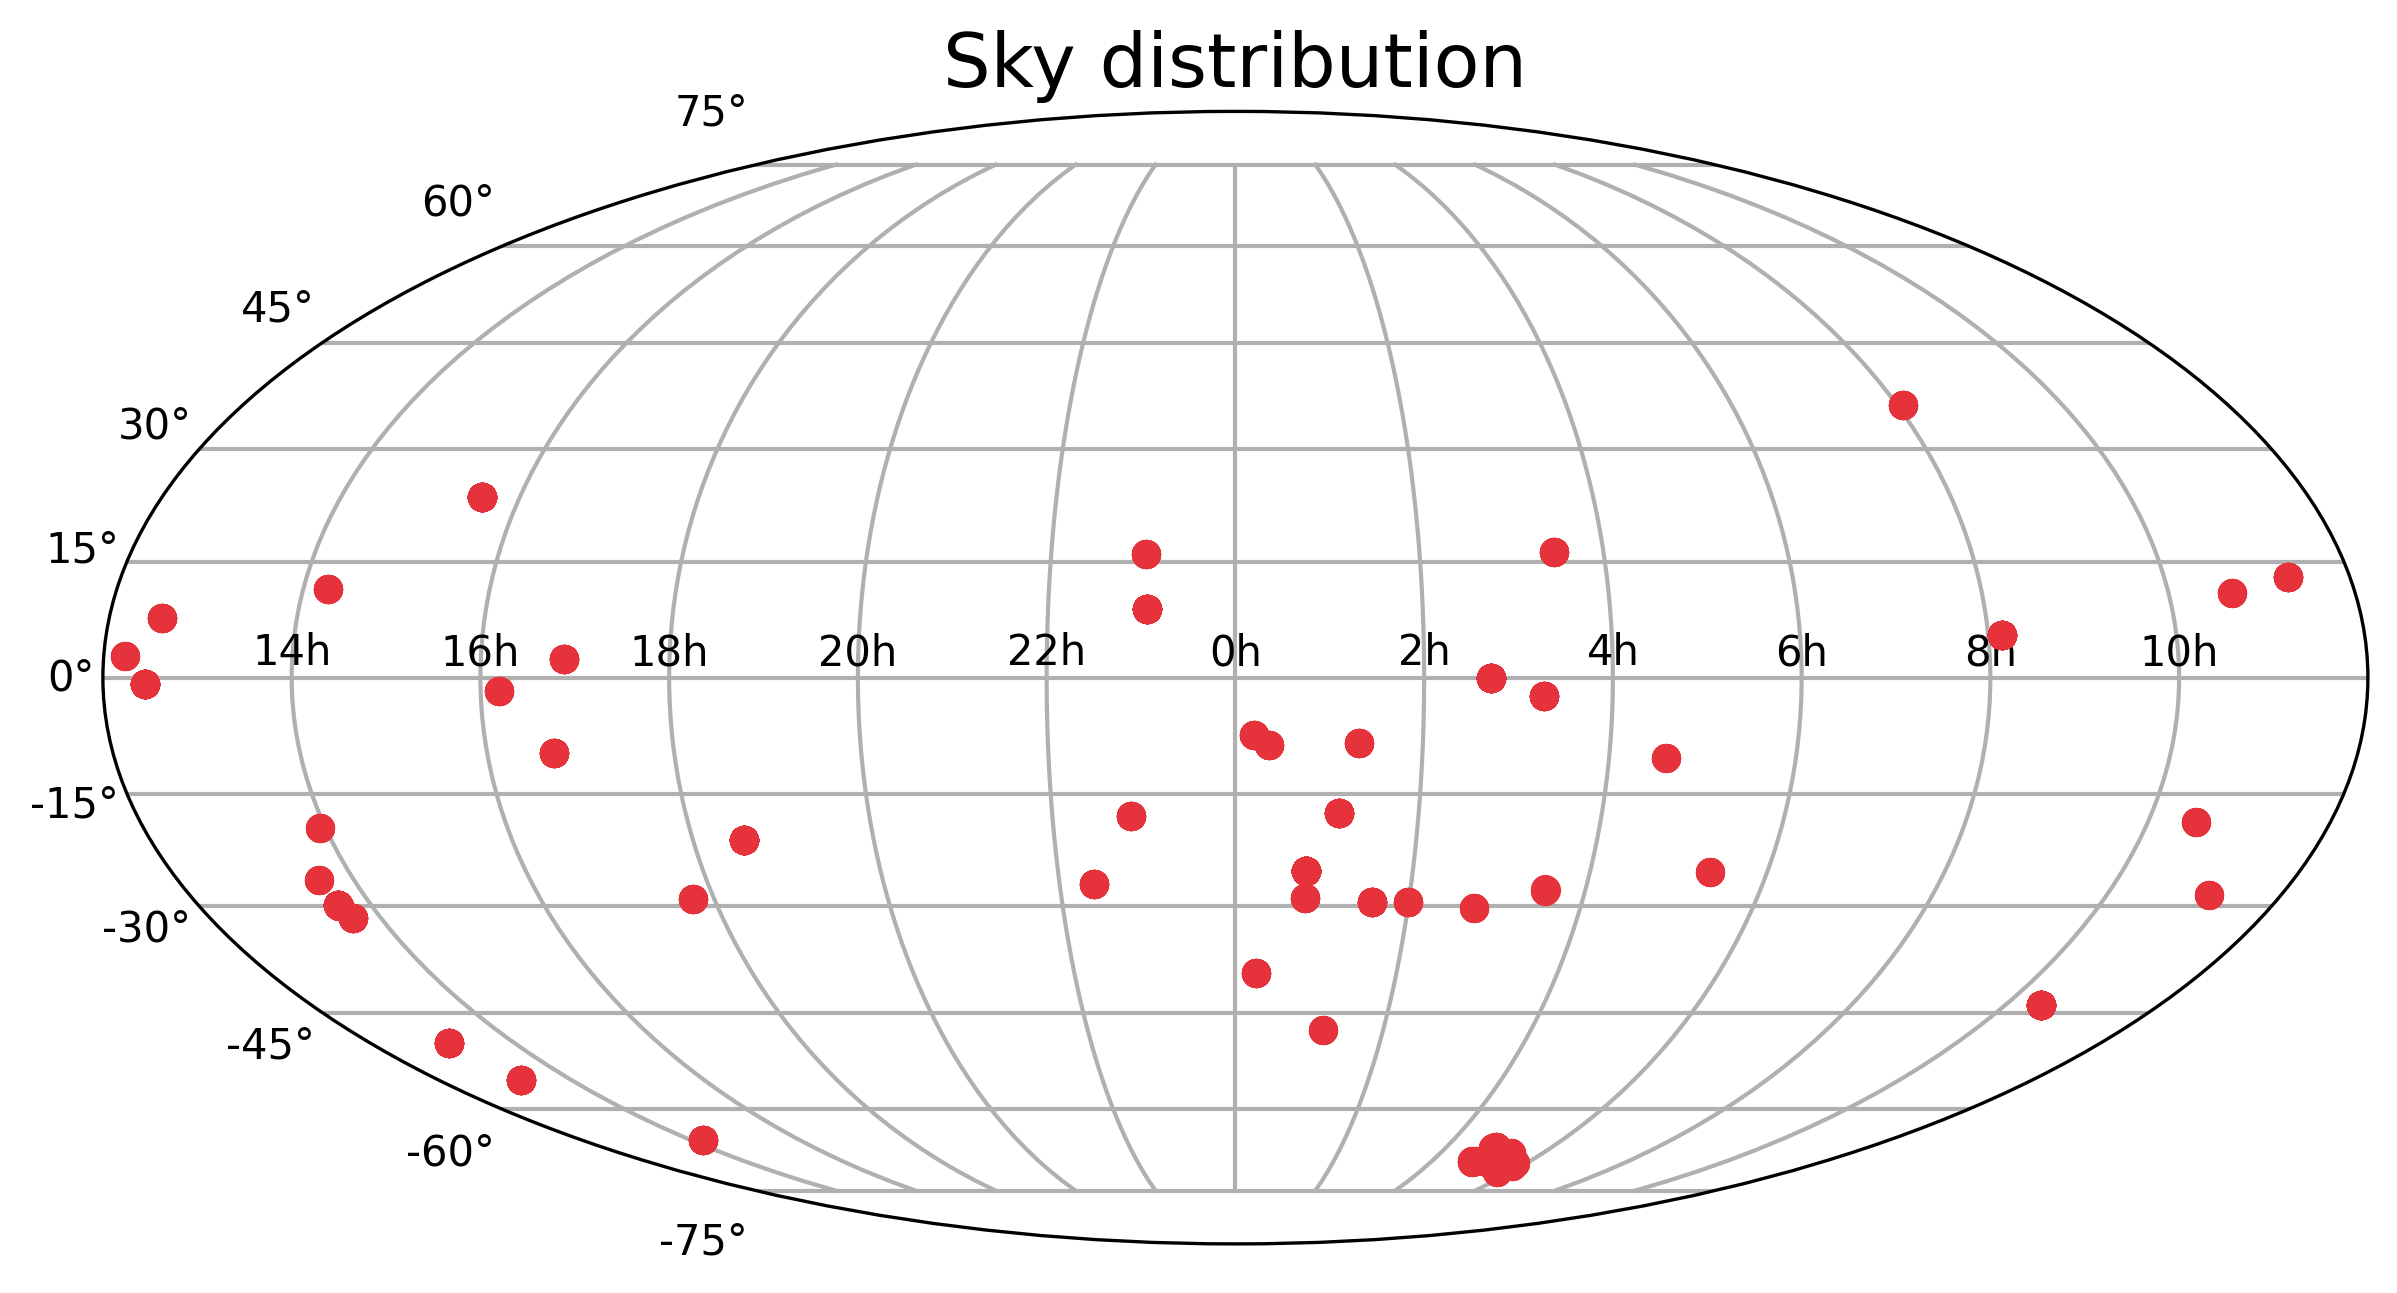

In [34]:
alminer.plot_sky(observations)

***

# 4. Create reports <a name="reports"></a>

This section introduces different ways to save query results:<br>

* [4.1 - Export results as a table (*alminer.save_table*)](#save_table)<br>
* [4.2 - Save overview plots for each target (*alminer.save_source_reports*)](#save_source_reports)<br>



## 4.1 Export results as a table <a name="save_table"></a>

The `alminer.save_table` function writes the provided DataFrame to a table in CSV format in the 'tables' folder within the current working directory. If the 'tables' folder does not exist, it will be created.

<br>

<details>
<summary style="display:list-item">Details of <code>save_table</code> function</summary>

* <u>Description</u>: Write the DataFrame with the query results to a table in CSV format. The table will be saved in the 'tables' subdirectory within the current working directory. If the directory doesn't exist, it will be created. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**save_table**(_observations, filename="mytable"_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
     * **filename (str)** : Name of the table to be saved in the 'tables' subdirectory. <br>
***
</details>

### Example 4.1.1: save query results as a table

In [35]:
alminer.save_table(observations, filename="galaxy_chemistry")

## 4.2 Save overview plots <a name="save_source_reports"></a>

The `alminer.save_source_reports` function creates overview plots of observed frequencies, angular resolution, LAS, frequency and velocity resolutions for each source in the provided DataFrame and saves them in PDF format in the 'reports' folder in the current working directory. If the 'reports' folder does not exist, it will be created. The reports are named after the target names. 

<u>Note</u>: Currently, the grouping is done based on ALMA target names, so the same source with a slighly different naming schemes will be treated as separate targets.

<br>

<details>
<summary style="display:list-item">Details of <code>save_source_reports</code> function</summary>

* <u>Description</u>: Create overview plots of observed frequencies, angular resolution, LAS, frequency and velocity resolutions for each source in the provided DataFrame and save them in PDF format in the 'reports' subdirectory.
    If the directory doesn't exist, it will be created. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**save_source_reports**(_observations, mark_freq='', z=0., mark_CO=False_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **mark_freq (list of float64, optional, default: '')** : A list of frequencies to mark on the plot with dashed lines. <br>
 * **z (float64, optional, default: 0)** : Redshift by which the frequencies given in 'mark_freq' and 'mark_CO' parameters should be shifted. Currently only one redshift can be given for all targets. <br>
 * **mark_CO (bool, optional, default: False)** : mark CO, <sup>13</sup>CO, and C<sup>18</sup>O frequencies on the plot with dashed lines. <br>
***
</details>

### Example 4.2.1: save overview plots of each target with CO lines marked

Let's first narrow down our large query to a smaller subset to only a range of frequencies (Band 3) and angular resolutions < 0.5":

In [36]:
selected = observations[(observations["min_freq_GHz"] > 80.0) & 
                        (observations["max_freq_GHz"] < 115.0) & 
                        (observations["ang_res_arcsec"] < 0.5)]
alminer.summary(selected)

--------------------------------
Number of projects = 8
Number of observations = 17
Number of unique subbands = 62
Total number of subbands = 62
8 target(s) with ALMA data = ['NGC1266', 'Arp220', 'ngc6240', 'n613', 'NGC4418', 'NGC7469', 'Cloverleaf', 'GDS-48417']
--------------------------------


Now we can create and save plots for each source, with CO and its isotopologues marked:

In [37]:
alminer.save_source_reports(selected, mark_CO=True)

***

# 5. Download data <a name="download"></a>

The `alminer.download_data` function allows the user to download the data from the archive directly to a location on the local disk. 

#### General notes about the download function:
 * The default download location is the 'data' subdirectory in the current working directory. The desired location can be changed by setting the *location* parameter to the desired path.
 * To check the amount of disk space needed, the *dryrun* parameter can be toggled to *True* which will only stage the data and write to the terminal how much space is required.
 * By default, tar files (including both raw and FITS data products) associated with uids in the provided DataFrame will be downloaded.
 * To download only the FITS data products, the *fitsonly* parameter can be toggled to *True*.
 * It is possible to provide a list of strings (to the *filename_must_include* parameter) that the user wants to be included in the filenames that are downloaded. This is useful to restrict the download further, for example, to data that have been primary beam corrected ('.pbcor') or that have the science target ('_sci' or the ALMA target name). The choice is largely dependent on the cycle and type of reduction that was performed, and data products that exist on the archive as a result.
 * A list of URLs (files) to be downloaded from the archive can be printed to the terminal by setting *print_urls=True*.

<br>

<details>
<summary style="display:list-item">Details of <code>download_data</code> function</summary>

* <u>Description</u>: Download ALMA data from the archive to a location on the local machine. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**download_data**(_observations, fitsonly=False, dryrun=False, print_urls=False, filename_must_include='', location='./data'_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **fitsonly (bool, optional, default: False)** : Download individual fits files only (*fitsonly=True*). This option will not download the raw data (e.g. 'asdm' files), weblogs, or README files. <br>
 * **dryrun (bool, optional, default: False)** : Allow the user to do a test run to check the size and number of files to download without actually downloading the data (*dryrun=True*). To download the data, set *dryrun=False*. <br>
 * **print_urls (bool, optional, default: False)** : Write the list of urls to be downloaded from the archive to the terminal. <br>
 * **filename_must_include (list of str, optional, default: '')** : A list of strings the user wants to be contained in the url filename. This is useful to restrict the download further, for example, to data that have been primary beam corrected ('.pbcor') or that have the science target or calibrators (by including their names). The choice is largely dependent on the cycle and type of reduction that was performed and data products that exist on the archive as a result. In most recent cycles, the science target can be filtered out with the flag '_sci' or its ALMA target name. <br>
 * **location (str, optional, default: './data')** : directory where the downloaded data should be placed. <br>
***
</details>

### Example 5.1: download all data products (raw + products)

In [38]:
alminer.download_data(selected, fitsonly=False, dryrun=True, location='./data', print_urls=False)

This is a dryrun. To begin download, set dryrun=False.
Download location = ./data
Total number of Member OUSs to download = 17
Selected Member OUSs: ['uid://A001/X121/X3d5', 'uid://A001/X121/X3d8', 'uid://A001/X121/X3d2', 'uid://A001/X121/X3cf', 'uid://A001/X2fe/Xcd2', 'uid://A001/X2fe/Xcd6', 'uid://A001/X2fe/Xcce', 'uid://A001/X2fe/X728', 'uid://A001/X2fe/X724', 'uid://A001/X5a4/X155', 'uid://A001/X87d/X1fb', 'uid://A001/X87d/X1f5', 'uid://A001/X87d/X207', 'uid://A001/X1290/X17', 'uid://A001/X1288/X6c2', 'uid://A001/X1288/X6be', 'uid://A001/X1590/Xd85']
Number of files to download = 98
Needed disk space = 4.1 TB
--------------------------------


### Example 5.2: download only continuum FITS images for the science target

In [39]:
alminer.download_data(selected, fitsonly=True, dryrun=True, location='./data', 
                 filename_must_include=['_sci', '.pbcor', 'cont'], print_urls=True)

This is a dryrun. To begin download, set dryrun=False.
Download location = ./data
Total number of Member OUSs to download = 20
Selected Member OUSs: ['2013.1.00988.S_uid___A001_X121_X3d5_external_ari_l_001_of_001.tar', '2013.1.00988.S_uid___A001_X121_X3d8_external_ari_l_001_of_001.tar', '2013.1.00988.S_uid___A001_X121_X3d2_external_ari_l_001_of_001.tar', '2013.1.00988.S_uid___A001_X121_X3cf_external_ari_l_001_of_001.tar', '2015.1.00167.S_uid___A001_X2fe_Xcd2_external_ari_l_001_of_001.tar', '2015.1.00167.S_uid___A001_X2fe_Xcd6_external_ari_l_001_of_001.tar', '2015.1.00167.S_uid___A001_X2fe_Xcce_external_ari_l_001_of_001.tar', '2015.1.01439.S_uid___A001_X2fe_X728_001_of_001.tar', '2015.1.01439.S_uid___A001_X2fe_X728_external_ari_l_001_of_001.tar', '2015.1.01439.S_uid___A001_X2fe_X724_001_of_001.tar', '2015.1.01439.S_uid___A001_X2fe_X724_external_ari_l_001_of_001.tar', '2015.1.01487.S_uid___A001_X5a4_X155_001_of_001.tar', '2015.1.01487.S_uid___A001_X5a4_X155_external_ari_l_001_of_001.tar'

***

# 6. Advanced query features <a name="advanced"></a>

This Section introduces:<br>

* [6.1 - Create and run your own TAP query](#own_query)<br>
* [6.2 - Convert results to ALminer format (*alminer.filter_results*)](#filter_results)<br>

## 6.1 Create and run your own TAP query <a name="create_query"></a>

You can use [Astronomical Data Query Language (ADQL)](https://www.ivoa.net/documents/ADQL/20180112/PR-ADQL-2.1-20180112.html) to create more complex queries relevant for your work. 

The ALminer querying functions provide an option to print the query string that was used to search the ALMA archive for the user by setting *print_query* parameter to *True*. 

Once you have created the query string of interest, you can run it using the `alminer.run_query` function.<br>
<br>

<details>
<summary style="display:list-item">Details of <code>run_query</code> function</summary>

* <u>Description</u>: Run the TAP query through PyVO service.<br>
<br>
* <u>Command</u>:<br>
 * alminer.**run_query**(_query_str_)<br>
<br>
* <u>Parameters</u>:<br>
 * **query_str (str)** : ADQL query to send to the PyVO TAP service <br> 
***
</details>

### Example 6.1.1: Retrieve the ADQL query string used in ALminer query functions

In [40]:
obs = alminer.keysearch({"science_keyword": ["'Galaxy chemistry'"]}, print_targets=False, print_query=True)

alminer.keysearch results 
Your query is: SELECT * FROM ivoa.obscore WHERE ((LOWER(science_keyword) LIKE '%galaxy chemistry%')) AND (LOWER(data_rights) LIKE '%public%') AND (LOWER(scan_intent) LIKE '%target%') ORDER BY proposal_id
--------------------------------
Number of projects = 54
Number of observations = 383
Number of unique subbands = 1316
Total number of subbands = 1529
Total number of targets with ALMA data = 79
--------------------------------


### Example 6.1.2: Modify the query string and run the query

In the previous example, we searched the ALMA archive for projects within the science keyword 'Galaxy chemistry'. But let's say you want to exclude all observations of the target M83 at the same time.

You can modify the query string accordingly using the 'NOT LIKE' logic:

In [44]:
query_str = "SELECT * FROM ivoa.obscore WHERE ((LOWER(science_keyword) LIKE '%galaxy chemistry%')) AND (LOWER(data_rights) LIKE '%public%') AND (LOWER(scan_intent) LIKE '%target%') AND (LOWER(target_name) NOT LIKE '%m83%') ORDER BY proposal_id"

And run the query

In [45]:
myquery = alminer.run_query(query_str)

## 6.2 Convert your own query results into ALminer format <a name="filter_results"></a>

To make use of other `alminer` functions, the resulting DataFrame returned from running your query has to be converted to `alminer` format where a few useful columns are added to the DataFrame. This can be done through the `alminer.filter_results` function. <br>
 <br>
<details>
<summary style="display:list-item">Details of <code>filter_results</code> function</summary>

* <u>Description</u>: Add a few new useful columns to the pandas.DataFrame with the query results from the PyVO TAP service and return the full query DataFrame and optionally a summary of the results. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**filter_results**(_TAP_df, print_targets=True_)<br>
<br>
* <u>Parameters</u>:<br>
 * **TAP_df (pandas.DataFrame)** : This is likely the output of `run_query` function. <br> 
 * **print_targets (bool, optional)** : Print a list of targets with ALMA data (ALMA source names) to the terminal. <br>
* <u>Returns</u>:<br>
 *  **pandas.DataFrame** containing the query results.<br>
***
</details>

### Example 6.2.1: Convert query results to ALminer format

In [46]:
myquery_obs = alminer.filter_results(myquery)

--------------------------------
Number of projects = 49
Number of observations = 363
Number of unique subbands = 1239
Total number of subbands = 1448
77 target(s) with ALMA data = ['LESS J0332-2756', 'PKS1830-211', 'ngc4418', 'NGC7469', 'NGC_1097', 'Arp220', 'NGC_5253', 'NGC253', 'NGC1266', 'vv114', 'Mystery_Object', 'Sgr_A_star', 'SDSS_J080430.99+360718.1', 'NGC_3256', 'ngc_3256', 'NGC_55', 'ngc3256', 'NGC4418', 'NGC_3627_BE', 'circinus', 'IRAS_F16399-0937', 'ngc6240', 'n613', 'ngc613', 'ngc253', 'N159-E', 'N159-W', 'N159-W_south', 'IRAS_13120-5453', 'ngc4945', 'HE1029-1831', 'HE0433-1028', 'HE1108-2813', 'HE1353-1917', 'HE0108-4743', 'Y051916.87-693757.5', 'Y054826.21-700850.2', 'Y044854.41-690948.3', 'Y050355.87-672045.1', 'Y052343.48-680033.9', 'Y045406.43-664601.4', 'Y051344.99-693510.6', 'Y052333.40-693712.1', 'Y050953.89-685336.7', 'ST10', 'Y054629.32-693514.2', 'Y045100.16-691934.4', 'Y051912.27-690907.2', 'Y054248.90-694446.3', 'Y045622.61-663656.9', 'Y053952.11-710930.7', 'S

Now you can use all the analysis and plotting routines presented before on these observations.

***

# 7. Glossary of functions <a name="glossary"></a>

### Query Functions

<br>
<details>
<summary style="display:list-item">Details of <code>catalog</code> function</summary>

* <u>Description</u>: Query the ALMA archive for a list of coordinates or a catalog of sources based on their coordinates. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**catalog**(_target_df, search_radius=1., point=False, public=True, published=None, print_query=False, print_targets=True_)<br>
<br>
* <u>Parameters</u>:<br>
 * **target_df (pandas.DataFrame)** : DataFrame with source names and coordinates; it must have at least the following three columns: "*Name*", "*RAJ2000*", "*DEJ2000*". "*Name*" describes the target name (can be numbers or dummy names), "*RAJ2000*" is the right ascension in degrees (ICRS), "*DEJ2000*" is the declination in degrees (ICRS) <br>
 * **search_radius (float, optional, default: 1 arcmin)** : Search radius (in arcmin) around the source coordinates. <br>
 * **point (bool, optional, default: True)** : Search whether the specified position (ra, dec) is contained within any ALMA observations (*point=True*) or query all ALMA observations that overlap with a cone centred at the specified position (ra, dec) and extending the search_radius (*point=False*). In the case of *point=True*, the search_radius parameter is ignored. Note that *point=True* is much faster than *point=False* but the latter should be used if one is interested in searching for mosaics.<br>
 * **public (bool, optional, default: True)** : Search for public data (*public=True*), proprietary data (*public=False*), or both public and proprietary data (*public=None*). <br>
 * **published (bool, optional, default: None)** : Search for published data only (*published=True*), unpublished data only (*published=False*), or both published and unpublished data (*published=None*). <br>
 * **print_query (bool, optional, default: False)** : Print the ADQL TAP query to the terminal. <br>
 * **print_targets (bool, optional, default: True)** : Print a list of targets with ALMA data (ALMA source names) to the terminal. <br>
 <br>
* <u>Returns</u>:<br>
 *  **pandas.DataFrame** containing the query results.
***
</details>  

<details>
<summary style="display:list-item">Details of <code>conesearch</code> function</summary>

* <u>Description</u>: Query the ALMA archive for a given position and radius around it.<br>
    <br>
* <u>Command</u>:<br>
 * alminer.**conesearch**(_ra, dec, search_radius=1., point=False, public=True, published=None, print_targets=True, print_query=False_)<br>
<br>
* <u>Parameters</u>:<br>
 * **ra (float)** : Right ascension in degrees (ICRS). <br>
 * **dec (float)** : Declination in degrees (ICRS). <br>
 * **search_radius (float, optional, default: 1 arcmin)** : Search radius (in arcmin) around the source coordinates. <br>
 * **point (bool, optional, default: True)** : Search whether the specified position (ra, dec) is contained within any ALMA observations (*point=True*) or query all ALMA observations that overlap with a cone centred at the specified position (ra, dec) and extending the search_radius (*point=False*). In the case of *point=True*, the search_radius parameter is ignored. Note that *point=True* is much faster than *point=False* but the latter should be used if one is interested in searching for mosaics.<br>
 * **public (bool, optional, default: True)** : Search for public data (*public=True*), proprietary data (*public=False*), or both public and proprietary data (*public=None*). <br>
 * **published (bool, optional, default: None)** : Search for published data only (*published=True*), unpublished data only (*published=False*), or both published and unpublished data (*published=None*). <br>
 * **print_query (bool, optional, default: False)** : Print the ADQL TAP query to the terminal. <br>
 * **print_targets (bool, optional, default: True)** : Print a list of targets with ALMA data (ALMA source names) to the terminal. <br>
 <br>
* <u>Returns</u>:<br>
 *  **pandas.DataFrame** containing the query results.
***
</details>  

<details>
<summary style="display:list-item">Details of <code>keysearch</code> function</summary>

* <u>Description</u>: Query the ALMA archive for any (string-type) keywords defined in ALMA TAP system. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**keysearch**(_search_dict, public=True, published=None, print_query=False, print_targets=True_)<br>
<br>
* <u>Parameters</u>:<br>
 * **search_dict (dict[str, list of str])** : Dictionary of keywords in the ALMA archive and their values. Values must be formatted as a list of strings. For a list of valid keywords see [table](#TAP_table) below. <br> 
 * **public (bool, optional, default: True)** : Search for public data (*public=True*), proprietary data (*public=False*), or both public and proprietary data (*public=None*). <br>
 * **published (bool, optional, default: None)** : Search for published data only (*published=True*), unpublished data only (*published=False*), or both published and unpublished data (*published=None*). <br>
 * **print_query (bool, optional, default: False)** : Print the ADQL TAP query to the terminal. <br>
 * **print_targets (bool, optional, default: True)** : Print a list of targets with ALMA data (ALMA source names) to the terminal. <br>
 <br>
* <u>Returns</u>:<br>
 *  **pandas.DataFrame** containing the query results.
***
</details>

<details>
<summary style="display:list-item">Details of <code>target</code> function</summary>
    
* <u>Description</u>: Query targets by name. <br>
 * This is done by using the astropy SESAME resolver to get the target's coordinates and then the ALMA archive is queried for those coordinates and a search_radius around them. The SESAME resolver searches multiple databases (Simbad, NED, VizieR) to parse names commonly found throughout literature and returns their coordinates. If the target is not resolved in any of these databases, consider using the `keysearch` function and query the archive using the 'target_name' keyword (e.g. `keysearch({'target_name': sources})`).<br>
<br>
* <u>Command</u>:<br>
 * alminer.**target**(_sources, search_radius=1., point=False, public=True, published=None, print_query=False, print_targets=True_)<br>
<br>
* <u>Parameters</u>:<br>
 * **sources (list of str)** : list of sources by name. (IMPORTANT: sources names must be identified by at least one of Simbad, NED, or Vizier) <br> 
 * **search_radius (float, optional, default: 1 arcmin)** : Search radius (in arcmin) around the source coordinates. <br>
 * **point (bool, optional, default: True)** : Search whether the specified position (ra, dec) is contained within any ALMA observations (*point=True*) or query all ALMA observations that overlap with a cone centred at the specified position (ra, dec) and extending the search_radius (*point=False*). In the case of *point=True*, the search_radius parameter is ignored. Note that *point=True* is much faster than *point=False* but the latter should be used if one is interested in searching for mosaics. <br>
 * **public (bool, optional, default: True)** : Search for public data (*public=True*), proprietary data (*public=False*), or both public and proprietary data (*public=None*). <br>
 * **published (bool, optional, default: None)** : Search for published data only (*published=True*), unpublished data only (*published=False*), or both published and unpublished data (*published=None*). <br>
 * **print_query (bool, optional, default: False)** : Print the ADQL TAP query to the terminal. <br>
 * **print_targets (bool, optional, default: True)** : Print a list of targets with ALMA data (ALMA source names) to the terminal. <br>
 <br>
* <u>Returns</u>:<br>
 *  **pandas.DataFrame** containing the query results.
***
</details>


### Analysis Functions

<br>
<details>
<summary style="display:list-item">Details of <code>CO_lines</code> function</summary>

* <u>Description</u>: Determine how many CO, <sup>13</sup>CO, and C<sup>18</sup>O lines were observed in the provided query DataFrame. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**CO_lines**(_observations, z=0., print_summary=True, print_targets=True_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **z (float64, optional, default: 0)** : Redshift by which the frequency given in 'line_freq' parameter should be shifted. <br>
 * **print_summary (bool, optional, default: True)** : Print a summary of the observations to the terminal. <br>
 * **print_targets (bool, optional, default: True)** : Print a list of targets with ALMA data (ALMA source names) to the terminal. <br>
 <br>
* <u>Returns</u>:<br>
 * **pandas.DataFrame** containing all observations of CO, <sup>13</sup>CO, and C<sup>18</sup>O
***
</details>

<details>
<summary style="display:list-item">Details of <code>explore</code> function</summary>

* <u>Description</u>: Control how much of the pandas.DataFrame with the query results is presented in the displayed table. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**explore**(_observations, allcols=False, allrows=False_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **allcols (bool, optional, default: False)** : Show all 81 columns (*allcols=True*), or the first 18 columns (*allcols=False*). <br>
 * **allrows (bool, optional, default: False)** : Show all rows in the DataFrame (*allrows=True*), or just a summary (*allrows=False*). <br>
 <br>
* <u>Returns</u>:<br>
 *  **pandas.DataFrame** containing the query results displayed to the user interface as specified by the user.
***
</details>

<details>
<summary style="display:list-item">Details of <code>get_info</code> function</summary>

* <u>Description</u>: Print the description and units of a given column in the query results DataFrame.<br>
<br>
* <u>Command</u>:<br>
 * alminer.**get_info**(_column_)<br>
<br>
* <u>Parameters</u>:<br>
 * **column (str)** : A column in the pandas.DataFrame query table.<br> 
***
</details>

<details>
<summary style="display:list-item">Details of <code>line_coverage</code> function</summary>

* <u>Description</u>: Determine how many observations were observed at a given frequency (+redshift). <br>
<br>
* <u>Command</u>:<br>
 * alminer.**line_coverage**(_observations, line_freq, z=0., line_name='', print_summary=True, print_targets=True_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations** : pandas.DataFrame (This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions.) <br> 
 * **line_freq (float64)** : Frequency of the line of interest in GHz. <br>
 * **z (float64, optional, default: 0)** : Redshift by which the frequency given in 'line_freq' parameter should be shifted. <br>
 * **line_name (str, optional, default: '')** : Name of the line specified in 'line_freq'. <br>
 * **print_summary (bool, optional, default: True)** : Print a summary of the observations to the terminal. <br>
 * **print_targets (bool, optional, default: True)** : Print a list of targets with ALMA data (ALMA source names) to the terminal. <br>
 <br>
* <u>Returns</u>:<br>
 * **pandas.DataFrame** containing all observations of line of interest.
***
</details>

<details>
<summary style="display:list-item">Details of <code>summary</code> function</summary>

* <u>Description</u>: Print a summary of the observations. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**summary**(_observations, print_targets=True_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **print_targets (bool, optional, default: True)** : Print a list of targets with ALMA data (ALMA source names) to the terminal. <br>
 <br>
***
</details>

### Plotting Functions

<br>
<details>
<summary style="display:list-item">Details of <code>plot_bands</code> function</summary>

* <u>Description</u>: Create overview and detailed plots of observed frequencies in each band. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**plot_bands**(_observations, mark_freq='', z=0., mark_CO=False, showfig=True, savefig=None_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **mark_freq (list of float64, optional, default: '')** : A list of frequencies to mark on the plot with dashed lines. <br>
 * **z (float64, optional, default: 0)** : Redshift by which the frequencies given in 'mark_freq' and 'mark_CO' parameters should be shifted. Currently only one redshift can be given for all targets. <br>
 * **mark_CO (bool, optional, default: False)** : mark CO, <sup>13</sup>CO, and C<sup>18</sup>O frequencies on the plot with dashed lines. <br>
 * **showfig (bool, optional, default: True)** : Display the plot (*showfig=True*) or not (*showfig=False*). <br>
 * **savefig (str, optional, default: None)** : Filename (without an extension) for the plot to be saved as. Default file extension is PDF. Figure is saved in a subdirectory called 'reports' within the current working directory. If the directory doesn't exist, it will be created. Default quality is dpi=300. <br>
 <br>
***
</details>

<details>
<summary style="display:list-item">Details of <code>plot_line_overview</code> function</summary>

* <u>Description</u>: Create overview plots of observed frequencies, angular resolution, LAS, frequency and velocity resolutions, highlighting the observations of a give (redshifted) frequency with hatches on the bar plots. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**plot_line_overview**(_observations, line_freq, z=0., line_name='', showfig=True, savefig=None_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **line_freq (float64)** : Frequency of the line of interest in GHz. <br>
 * **z (float64, optional, default: 0)** : Redshift by which the frequency given in 'line_freq' parameter should be shifted. <br>
 * **line_name (str, optional, default: '')** : Name of the line specified in 'line_freq'. <br>
 * **showfig (bool, optional, default: True)** : Display the plot (*showfig=True*) or not (*showfig=False*). <br>
 * **savefig (str, optional, default: None)** : Filename (without an extension) for the plot to be saved as. Default file extension is PDF. Figure is saved in a subdirectory called 'reports' within the current working directory. If the directory doesn't exist, it will be created. Default quality is dpi=300. <br>
 <br>
***   
</details>

<details>
<summary style="display:list-item">Details of <code>plot_observations</code> function</summary>

* <u>Description</u>: Create detailed plots of observations in each band. The x-axis displays the observation number 'Obs' column in the input DataFrame. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**plot_observations**(_observations, mark_freq='', z=0., mark_CO=False, showfig=True, savefig=None_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **mark_freq (list of float64, optional, default: '')** : A list of frequencies to mark on the plot with dashed lines. <br>
 * **z (float64, optional, default: 0)** : Redshift by which the frequencies given in 'mark_freq' and 'mark_CO' parameters should be shifted. Currently only one redshift can be given for all targets. <br>
 * **mark_CO (bool, optional, default: False)** : mark CO, <sup>13</sup>CO, and C<sup>18</sup>O frequencies on the plot with dashed lines. <br>
 * **showfig (bool, optional, default: True)** : Display the plot (*showfig=True*) or not (*showfig=False*). <br>
 * **savefig (str, optional, default: None)** : Filename (without an extension) for the plot to be saved as. Default file extension is PDF. Figure is saved in a subdirectory called 'reports' within the current working directory. If the directory doesn't exist, it will be created. Default quality is dpi=300. <br>
 <br>
***
</details>

<details>
<summary style="display:list-item">Details of <code>plot_overview</code> function</summary>

* <u>Description</u>: Create overview plots of observed frequencies, angular resolution, LAS, frequency and velocity resolutions. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**plot_overview**(_observations, mark_freq='', z=0., mark_CO=False, showfig=True, savefig=None_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **mark_freq (list of float64, optional, default: '')** : A list of frequencies to mark on the plot with dashed lines. <br>
 * **z (float64, optional, default: 0)** : Redshift by which the frequencies given in 'mark_freq' and 'mark_CO' parameters should be shifted. Currently only one redshift can be given for all targets. <br>
 * **mark_CO (bool, optional, default: False)** : mark CO, <sup>13</sup>CO, and C<sup>18</sup>O frequencies on the plot with dashed lines. <br>
 * **showfig (bool, optional, default: True)** : Display the plot (*showfig=True*) or not (*showfig=False*). <br>
 * **savefig (str, optional, default: None)** : Filename (without an extension) for the plot to be saved as. Default file extension is PDF. Figure is saved in a subdirectory called 'reports' within the current working directory. If the directory doesn't exist, it will be created. Default quality is dpi=300. <br>
 <br>
***
</details>

<details>
<summary style="display:list-item">Details of <code>plot_sky</code> function</summary>
    
* <u>Description</u>: Plot the distribution of the targets on the sky. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**plot_sky**(_observations, showfig=True, savefig=None_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **showfig (bool, optional, default: True)** : Display the plot (*showfig=True*) or not (*showfig=False*). <br>
 * **savefig (str, optional, default: None)** : Filename (without an extension) for the plot to be saved as. Default file extension is PDF. Figure is saved in a subdirectory called 'reports' within the current working directory. If the directory doesn't exist, it will be created. Default quality is dpi=300. <br>
 <br>
***  
</details>

### Writing Files & Plots

<br>

<details>
<summary style="display:list-item">Details of <code>save_source_reports</code> function</summary>

* <u>Description</u>: Create overview plots of observed frequencies, angular resolution, LAS, frequency and velocity resolutions for each source in the provided DataFrame and save them in PDF format in the 'reports' subdirectory.
    If the directory doesn't exist, it will be created. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**save_source_reports**(_observations, mark_freq='', z=0., mark_CO=False_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **mark_freq (list of float64, optional, default: '')** : A list of frequencies to mark on the plot with dashed lines. <br>
 * **z (float64, optional, default: 0)** : Redshift by which the frequencies given in 'mark_freq' and 'mark_CO' parameters should be shifted. Currently only one redshift can be given for all targets. <br>
 * **mark_CO (bool, optional, default: False)** : mark CO, <sup>13</sup>CO, and C<sup>18</sup>O frequencies on the plot with dashed lines. <br>
***
</details>


<details>
<summary style="display:list-item">Details of <code>save_table</code> function</summary>

* <u>Description</u>: Write the DataFrame with the query results to a table in CSV format. The table will be saved in the 'tables' subdirectory within the current working directory. If the directory doesn't exist, it will be created. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**save_table**(_observations, filename="mytable"_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations** : pandas.DataFrame (This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions.) <br> 
     * **filename (str)** : Name of the table to be saved in the 'tables' subdirectory. <br>
***
</details>

### Downloading ALMA Data

<br>
<details>
<summary style="display:list-item">Details of <code>download_data</code> function</summary>

* <u>Description</u>: Download ALMA data from the archive to a location on the local machine. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**download_data**(_observations, fitsonly=False, dryrun=False, print_urls=False, filename_must_include='', location='./data'_)<br>
<br>
* <u>Parameters</u>:<br>
 * **observations (pandas.DataFrame)** : This is likely the output of e.g. `conesearch`, `target`, `catalog`, and `keysearch` functions. <br> 
 * **fitsonly (bool, optional, default: False)** : Download individual fits files only (*fitsonly=True*). This option will not download the raw data (e.g. 'asdm' files), weblogs, or README files. <br>
 * **dryrun (bool, optional, default: False)** : Allow the user to do a test run to check the size and number of files to download without actually downloading the data (*dryrun=True*). To download the data, set *dryrun=False*. <br>
 * **print_urls (bool, optional, default: False)** : Write the list of urls to be downloaded from the archive to the terminal. <br>
 * **filename_must_include (list of str, optional, default: '')** : A list of strings the user wants to be contained in the url filename. This is useful to restrict the download further, for example, to data that have been primary beam corrected ('.pbcor') or that have the science target or calibrators (by including their names). The choice is largely dependent on the cycle and type of reduction that was performed and data products that exist on the archive as a result. In most recent cycles, the science target can be filtered out with the flag '_sci' or its ALMA target name. <br>
 * **location (str, optional, default: './data')** : directory where the downloaded data should be placed. <br>
***
</details>


### Advanced Query Functions

<br>

<details>
<summary style="display:list-item">Details of <code>filter_results</code> function</summary>

* <u>Description</u>: Add a few new useful columns to the pandas.DataFrame with the query results from the PyVO TAP service and return the full query DataFrame and optionally a summary of the results. <br>
<br>
* <u>Command</u>:<br>
 * alminer.**filter_results**(_TAP_df, print_targets=True_)<br>
<br>
* <u>Parameters</u>:<br>
 * **TAP_df (pandas.DataFrame)** : This is likely the output of `run_query` function. <br> 
 * **print_targets (bool, optional)** : Print a list of targets with ALMA data (ALMA source names) to the terminal. <br>
* <u>Returns</u>:<br>
 *  **pandas.DataFrame** containing the query results.<br>
***
</details>

<details>
<summary style="display:list-item">Details of <code>run_query</code> function</summary>

* <u>Description</u>: Run the TAP query through PyVO service.<br>
<br>
* <u>Command</u>:<br>
 * alminer.**run_query**(_query_str_)<br>
<br>
* <u>Parameters</u>:<br>
 * **query_str (str)** : ADQL query to send to the PyVO TAP service <br> 
***
</details>

<!-- 
<details>
<summary style="display:list-item">Details of <code></code> function</summary>

* <u>Description</u>: <br>
<br>
* <u>Command</u>:<br>
 * alminer.****(__)<br>
<br>
* <u>Parameters</u>:<br>
 * **** :  <br> 
 * **** :  <br>
 * **** :  <br>
 * **** :  <br>
***
</details> -->

***

# 8. Workstation <a name="workstation"></a>

You can create your own examples below. Happy mining 😉